# Predicting Bushfires in Australia¶

### Checking the NPSW Fire History dataset for suitability

In [1]:
import pandas as pd
from simpledbf import Dbf5

dbf = Dbf5('C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\NPWSFireHistory.dbf')
dfnsw = dbf.to_dataframe()
dfnsw.head()

PyTables is not installed. No support for HDF output.


,FireName,FireNo,Label,StartDate,EndDate,AreaHa,PerimeterM,VerDate
0,NaN,NaN,1970-71 Prescribed Burn,NaN,NaN,299.985464,8615.637120,22/8/2024
1,NaN,70/161,1970-71 Prescribed Burn,NaN,NaN,309.025645,20657.633993,22/8/2024
2,NaN,NaN,1970-71 Prescribed Burn,1970-07-01,NaN,13.600002,1999.487701,22/8/2024
3,NaN,0,1971-72 Prescribed Burn,1971-07-01,NaN,58.994371,5312.210152,22/8/2024
4,NaN,0,1971-72 Prescribed Burn,1971-07-01,NaN,383.155154,20564.602731,22/8/2024


In [2]:
dfnsw.shape

(35825, 8)

In [3]:
dfnsw.sample(15)

,FireName,FireNo,Label,StartDate,EndDate,AreaHa,PerimeterM,VerDate
30327,Round Waterhole,14111378023,2014-15 Wildfire,2014-11-13,2014-12-04,8817.437463,95877.921993,22/8/2024
10220,Murrabrine,NaN,2000-01 Wildfire,NaN,NaN,83.156067,4346.119358,22/8/2024
6157,NaN,NaN,2001-02 Wildfire,NaN,NaN,259.848399,12700.531557,22/8/2024
1151,SF NSW HR burns,NaN,2001-02 Prescribed Burn,NaN,NaN,109.292619,5002.711172,22/8/2024
34817,"167 Davis Road, Swan Bay",23012882257,2022-23 Wildfire,2023-01-28,2023-01-29,0.139533,147.429026,22/8/2024
15,NaN,76/160,1976-77 Prescribed Burn,NaN,NaN,24.436719,2209.584978,22/8/2024
1505,SF-NSW - HRB,SF-....HBR,2005-06 Prescribed Burn,2005-08-15,NaN,21.860218,1991.264695,22/8/2024
33042,STHR_SNOW_Spicer Hill,HR15102374216,2018-19 Prescribed Burn,2019-04-12,2019-04-23,338.264052,8504.417136,22/8/2024
2398,NaN,NaN,1976-77 Wildfire,NaN,NaN,2610.126558,30067.074601,22/8/2024
32938,COCO Doon Gonge LMZ,HR16091377969,2018-19 Prescribed Burn,2018-07-09,2018-07-14,82.776251,7611.987361,22/8/2024


In [4]:
dfnsw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35825 entries, 0 to 35824
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FireName    21193 non-null  object 
 1   FireNo      18309 non-null  object 
 2   Label       35825 non-null  object 
 3   StartDate   19975 non-null  object 
 4   EndDate     15165 non-null  object 
 5   AreaHa      35825 non-null  float64
 6   PerimeterM  35825 non-null  float64
 7   VerDate     35825 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.2+ MB


In [9]:
# Not enough labelling information e.g. location missing for a lot of entries.  Need to look for another source of data.
# So I asked NASA! https://firms.modaps.eosdis.nasa.gov/

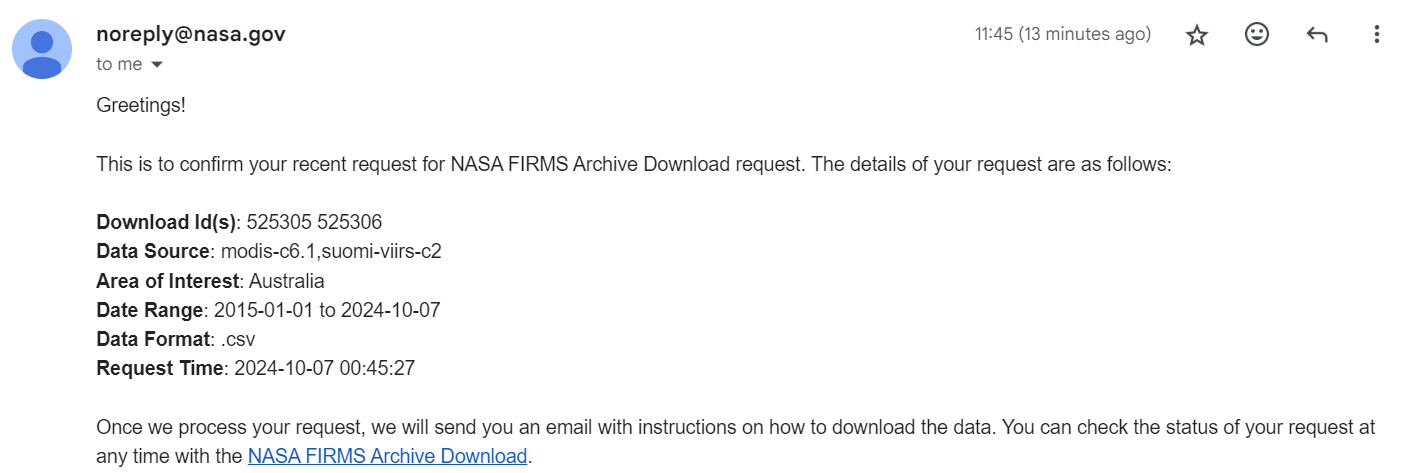

In [11]:
from IPython.display import Image, display

display(Image(filename= 'C:\\Users\\mdjro\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-10-07 120005.png'))

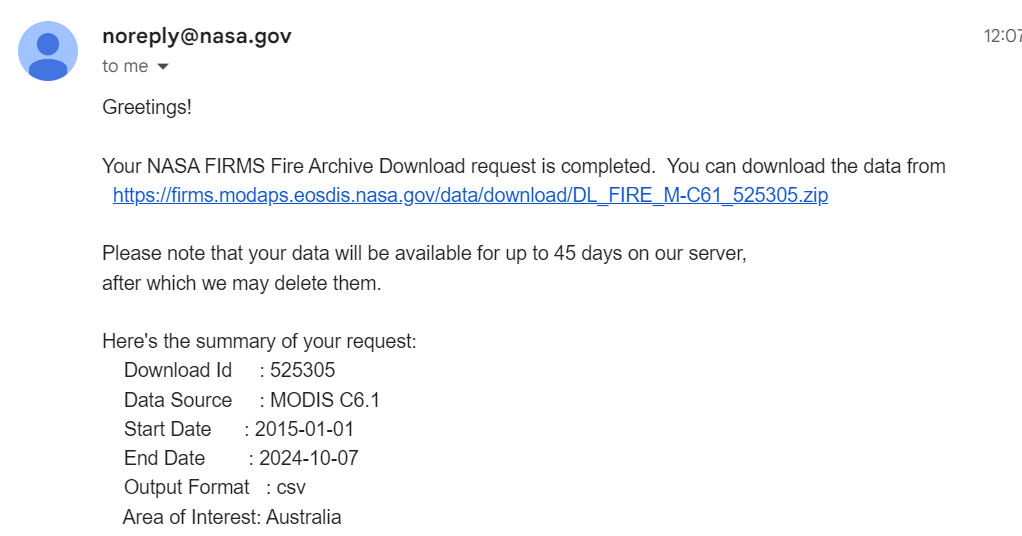

In [12]:
display(Image(filename='C:\\Users\\mdjro\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-10-07 121023.png'))

### Import Libraries

In [16]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Data Dictionary

- Latitude: Center of nominal 375 m fire pixel.
- Longitude:  Center of nominal 375 m fire pixel.
- Brightness: Channel 21/22 brightness temperature of the fire pixel measured in Kelvin.
- Scan: The algorithm produces approximately 375 m pixels at nadir. Scan and track reflect actual pixel size.
- Track: The algorithm produces approximately 375 m pixels at nadir. Scan and track reflect actual pixel size.
- Acquisition Date: Date of VIIRS acquisition.
- Acquisition Time: Time of acquisition/overpass of the satellite (in UTC).
- Satellite: N = Suomi National Polar-orbiting Partnership (Suomi NPP). N20 = NOAA-20 (JPSS1). N21 = NOAA-21 (JPSS2).
- Instrument: VIIRS
- Confidence: Helps users gauge the quality of individual hotspot/fire pixels. Confidence values are set to low (l), nominal (n), and high (h).
- Version: Version (collection and source)
- Bright_t31: Channel 31 brightness temperature of the fire pixel measured in Kelvin.
- frp: Fire Radiative Power (MW)
- Daynight: D= Daytime fire, N= Nighttime fire
- Type: Inferred hot spot type. 0 = presumed vegetation fire, 1 = active volcano, 2 = other static land source, 3 = offshore detection (includes all detections over water)

VIIRS vs MODIS Differences
The spatial resolution of the active fire detection pixel from MODIS is 1 km. The VIIRS active fire products provides an improved spatial resolution, as compared to MODIS. The spatial resolution of the active fire detection pixel for VIIRS is 375 m. Additionally, VIIRS is able to detect smaller fires and can help delineate perimeters of ongoing large fires. 

### Read in the data and initial EDA

In [20]:
fire_nrt_VIIRS = "C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\VIIRS\\fire_nrt_VIIRS2.csv"

dfnrt = pd.read_csv(fire_nrt_VIIRS)

In [21]:
dfnrt.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-41.25933,145.82640,331.99,0.48,0.40,2024-05-01,353,N,VIIRS,n,2.0NRT,296.82,11.85,D
1,-40.94881,147.63397,329.72,0.41,0.37,2024-05-01,353,N,VIIRS,n,2.0NRT,291.81,1.67,D
2,-41.04193,146.85486,329.54,0.44,0.38,2024-05-01,353,N,VIIRS,n,2.0NRT,291.34,3.19,D
3,-40.94781,147.63712,332.51,0.41,0.37,2024-05-01,353,N,VIIRS,n,2.0NRT,293.98,3.39,D
4,-41.04416,146.85400,332.05,0.44,0.38,2024-05-01,353,N,VIIRS,n,2.0NRT,290.52,2.20,D


In [22]:
dfnrt.shape

(412693, 14)

In [23]:
fire_archive_VIIRS = "C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\VIIRS\\fire_archive_VIIRS2.csv"

df_fires = pd.read_csv(fire_archive_VIIRS)

In [24]:
df_fires.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-34.46005,150.88739,337.26,0.42,0.38,2015-01-01,402,N,VIIRS,n,2,300.09,6.08,D,2
1,-34.46084,150.88281,342.15,0.42,0.38,2015-01-01,402,N,VIIRS,n,2,302.23,6.08,D,2
2,-34.45472,150.87651,336.26,0.42,0.38,2015-01-01,402,N,VIIRS,n,2,302.46,3.46,D,2
3,-37.61764,147.51074,348.70,0.40,0.37,2015-01-01,402,N,VIIRS,n,2,277.44,7.60,D,0
4,-33.31349,150.62228,332.79,0.42,0.38,2015-01-01,403,N,VIIRS,n,2,301.44,3.29,D,0


In [25]:
df_fires.shape

(10673377, 15)

In [27]:
# The 'nrt' or 'near real-time' data is data from the preceding 3 months.
# It does not have the 'Type' column. This is only available in the 'Standard Quality' data (the 'archive' data).
# Given I have 10,673,377 rows of data in the 'archive' file, I will not use the 'nrt' file.

In [28]:
# I needed to reduce the number of rows as it kept crashing my laptop futher in the code

# Filter the dataset for rows where 'acq_datetime' is between 2020 and 2024
df_fires = df_fires[(df_fires['acq_date'] >= '2020-01-01') & (df_fires['acq_date'] < '2025-01-01')]

# Check the size of the filtered dataset
df_fires.shape

(4484869, 15)

### Further EDA on the chosen dataset

In [33]:
df_fires.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
10673372,-32.78092,117.83955,314.92,0.39,0.36,2024-04-30,1715,N,VIIRS,n,2,284.02,1.80,N,0
10673373,-32.78366,117.83464,295.28,0.39,0.36,2024-04-30,1715,N,VIIRS,n,2,281.70,0.66,N,0
10673374,-33.46338,117.04532,327.40,0.39,0.36,2024-04-30,1715,N,VIIRS,n,2,284.37,2.21,N,0
10673375,-33.67204,116.88245,299.07,0.38,0.36,2024-04-30,1715,N,VIIRS,n,2,281.66,1.11,N,0
10673376,-33.67104,116.69736,296.66,0.38,0.36,2024-04-30,1715,N,VIIRS,n,2,282.98,0.90,N,0


In [34]:
df_fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4484869 entries, 6188508 to 10673376
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  object 
 10  version     int64  
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
 14  type        int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 547.5+ MB


In [35]:
# Mixture of data types
# acq_date is an object and acq_time is an int64.  Not date time format.

In [36]:
df_fires.describe()

,latitude,longitude,brightness,scan,track,acq_time,version,bright_t31,frp,type
count,4.484869e+06,4.484869e+06,4.484869e+06,4.484869e+06,4.484869e+06,4.484869e+06,4484869.0,4.484869e+06,4.484869e+06,4.484869e+06
mean,-2.030904e+01,1.351068e+02,3.349884e+02,4.648338e-01,4.910289e-01,8.450226e+02,2.0,3.002680e+02,1.109974e+01,2.260088e-02
std,6.988595e+00,9.357127e+00,1.970874e+01,9.155399e-02,1.189979e-01,5.491598e+02,0.0,1.180818e+01,2.268295e+01,2.156907e-01
min,-4.351591e+01,1.136320e+02,2.080000e+02,3.200000e-01,3.600000e-01,2.280000e+02,2.0,0.000000e+00,-3.660000e+00,0.000000e+00
25%,-2.365112e+01,1.283567e+02,3.188500e+02,4.000000e-01,3.800000e-01,4.260000e+02,2.0,2.918700e+02,2.420000e+00,0.000000e+00
50%,-1.827992e+01,1.334267e+02,3.381700e+02,4.400000e-01,4.600000e-01,5.160000e+02,2.0,2.998300e+02,5.380000e+00,0.000000e+00
75%,-1.516010e+01,1.431464e+02,3.484900e+02,5.200000e-01,5.800000e-01,1.535000e+03,2.0,3.074600e+02,1.070000e+01,0.000000e+00
max,-9.378610e+00,1.535971e+02,3.670000e+02,8.000000e-01,7.800000e-01,1.835000e+03,2.0,3.867400e+02,2.108740e+03,3.000000e+00


In [37]:
# Let's make that easier to read by changing the format of scientific notation.
# Generate the description
desc = df_fires.describe()

# Apply formatting to the description using map
desc_formatted = desc.apply(lambda x: x.map(lambda y: f'{y:.2f}'))

# Display the formatted description in DataFrame format
formatted_df = pd.DataFrame(desc_formatted)
formatted_df.index.name = 'Statistic'  # Set index name for clarity
print(formatted_df)

             latitude   longitude  brightness        scan       track  \
Statistic                                                               
count      4484869.00  4484869.00  4484869.00  4484869.00  4484869.00   
mean           -20.31      135.11      334.99        0.46        0.49   
std              6.99        9.36       19.71        0.09        0.12   
min            -43.52      113.63      208.00        0.32        0.36   
25%            -23.65      128.36      318.85        0.40        0.38   
50%            -18.28      133.43      338.17        0.44        0.46   
75%            -15.16      143.15      348.49        0.52        0.58   
max             -9.38      153.60      367.00        0.80        0.78   

             acq_time     version  bright_t31         frp        type  
Statistic                                                              
count      4484869.00  4484869.00  4484869.00  4484869.00  4484869.00  
mean           845.02        2.00      300.27       1

In [38]:
# Nothing really screaming 'look at me'!

In [39]:
df_fires.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [40]:
# No missing data...hoorah!

In [41]:
for col in df_fires.columns:
    print(col, df_fires[col].nunique())

latitude 1841787
longitude 1819486
brightness 7171
scan 49
track 43
acq_date 1564
acq_time 577
satellite 1
instrument 1
confidence 3
version 1
bright_t31 13159
frp 22229
daynight 2
type 3


In [42]:
# There is only one value in the satellite, instrument and version columns. 
# Given this data is common across ALL entries, it is not likely to affect any predictions and can probably be dropped.

In [43]:
# Print unique values in a specific column
df_fires['confidence'].unique()

array(['l', 'n', 'h'], dtype=object)

In [44]:
# That looks fine......n, l, h were expected values.  May need to encode?

In [45]:
# Print unique values in a specific column
df_fires['daynight'].unique()

array(['D', 'N'], dtype=object)

In [46]:
# Again, looks fine.  Values were as expected.

In [47]:
# Print unique values in a specific column
df_fires['type'].unique()

array([0, 3, 2], dtype=int64)

In [48]:
# Thankfully no active volcanoes!!!! :-)

#### So where are these fires occurring?

In [50]:
from shapely.geometry import Point
import pyproj

In [51]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_fires,
    geometry=gpd.points_from_xy(df_fires['longitude'], df_fires['latitude']),
    crs="EPSG:4326"  # Set the coordinate reference system
)

In [52]:
import contextily as ctx

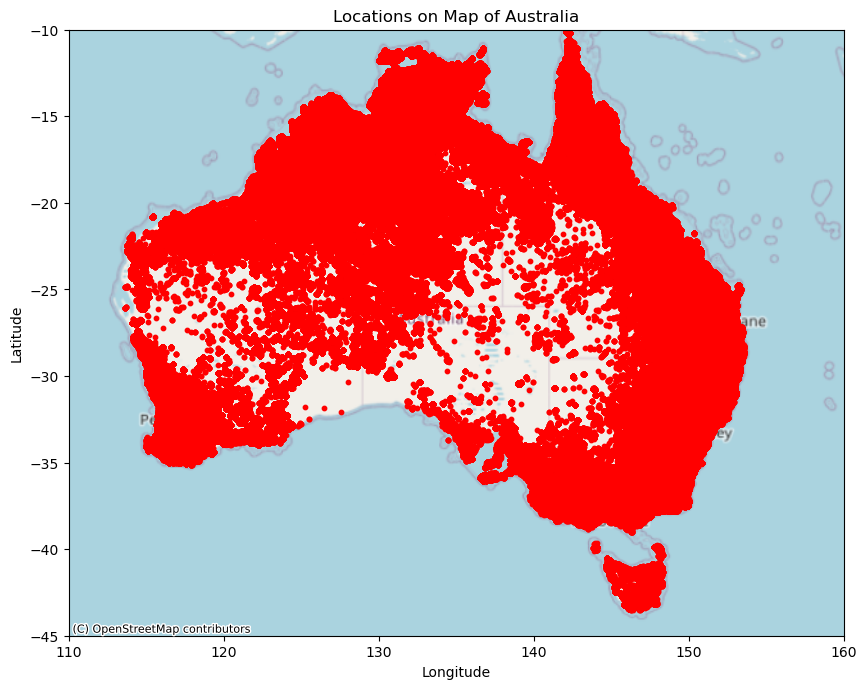

In [57]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Set the limits to focus on Australia
ax.set_xlim(110, 160)  # Longitude limits
ax.set_ylim(-45, -10)  # Latitude limits

# Plot the points
gdf.plot(ax=ax, color='red', markersize=10)

# Add a basemap from contextily using OpenStreetMap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Locations on Map of Australia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [59]:
# The map wasn't very inciteful; except for a few areas, everywhere had experienced fire

In [63]:
# After looking at the bushfire prone areas dataset, I wanted to impute the suburb for the coordinates in this dataframe in order to merge them somehow.
# I found a dataset of Australian placenames and their lat/lon here: https://www.peter-johnson.com.au/AustraliaPlaces

# Read in the data
coords_csv = "C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\AustraliaPlaces.csv"

try:
    df_coords = pd.read_csv(coords_csv, encoding='ISO-8859-1')  
    print(df_coords.head())  # Display the first few rows to check
except Exception as e:
    print(f"Error reading the file: {e}")

      Acacia Park  NSW  -30.5403962  151.6804555
0       Akuna Bay  NSW   -33.648331  151.2344447
1  Albion Heights  TAS   -42.958049  147.3215466
2     Albion Hill  NSW   -29.781666  151.1344369
3        Allambie  NSW   -33.773327  151.2594443
4     Amity Point  QLD   -27.401394  153.4411291


In [64]:
df_coords.head(10)

,Acacia Park,NSW,-30.5403962,151.6804555
0,Akuna Bay,NSW,-33.648331,151.2344447
1,Albion Heights,TAS,-42.958049,147.3215466
2,Albion Hill,NSW,-29.781666,151.1344369
3,Allambie,NSW,-33.773327,151.2594443
4,Amity Point,QLD,-27.401394,153.4411291
5,Ammerdown,NSW,-33.246048,149.0714525
6,Apollo Parkways,VIC,-37.688360,145.1099911
7,Apollo,NSW,-32.231611,148.6342738
8,Ardyaloon,WA,-16.446351,123.0605664
9,Aurville,NSW,-34.545677,148.3646237


In [65]:
# Need to assign correct headers
df_coords.columns = ['suburb', 'state', 'latitude', 'longitude']  
df_coords.head()

,suburb,state,latitude,longitude
0,Akuna Bay,NSW,-33.648331,151.2344447
1,Albion Heights,TAS,-42.958049,147.3215466
2,Albion Hill,NSW,-29.781666,151.1344369
3,Allambie,NSW,-33.773327,151.2594443
4,Amity Point,QLD,-27.401394,153.4411291


In [67]:
# Now I can use this coords dataset to get the nearest suburb and State / Territory of the locations in the fires dataset

In [68]:
from scipy.spatial import cKDTree

In [71]:
# Create suburb tree
suburb_coords = df_coords[['latitude', 'longitude']].values
tree = cKDTree(suburb_coords)

# Find the nearest suburb for each coordinate in fires
distances, indices = tree.query(df_fires[['latitude', 'longitude']].values)

# Create the nearest_suburb series
nearest_suburbs = df_coords.iloc[indices]

# Insert the new columns as the 3rd and 4th columns in fires
df_fires.insert(2, 'suburb', nearest_suburbs['suburb'].values)
df_fires.insert(3, 'state', nearest_suburbs['state'].values)


In [72]:
df_fires.sample(10)

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
8929928,-14.23571,131.80280,Darwin,NT,340.76,0.44,0.63,2023-05-21,531,N,VIIRS,n,2,300.95,3.68,D,0
10458351,-16.07797,127.77193,Mulan,WA,355.97,0.55,0.43,2023-12-26,523,N,VIIRS,n,2,315.37,48.23,D,0
8227295,-13.97538,127.05844,Darwin,NT,311.12,0.32,0.54,2022-06-22,1721,N,VIIRS,n,2,290.77,1.40,N,0
9612387,-21.86869,148.24895,Bootooloo,QLD,323.52,0.53,0.42,2023-10-10,1536,N,VIIRS,n,2,289.35,2.17,N,0
8048655,-16.80599,128.04074,Mulan,WA,367.00,0.46,0.64,2022-04-25,419,N,VIIRS,h,2,305.86,13.64,D,0
6926032,-14.76243,143.73891,Cairns,QLD,301.19,0.40,0.37,2020-11-12,1546,N,VIIRS,n,2,283.36,0.86,N,0
9677136,-15.25736,145.09383,Cairns,QLD,334.00,0.40,0.37,2023-10-15,1541,N,VIIRS,n,2,293.76,2.84,N,0
8950378,-15.16858,126.09158,Ardyaloon,WA,333.88,0.37,0.58,2023-05-24,434,N,VIIRS,n,2,301.09,2.90,D,0
7848166,-21.65731,146.25859,Townsville,QLD,348.72,0.43,0.46,2022-01-03,418,N,VIIRS,n,2,312.96,13.64,D,0
10445131,-15.16722,131.69394,Darwin,NT,343.42,0.50,0.49,2023-12-24,420,N,VIIRS,n,2,301.96,28.18,D,0


In [75]:
# I checked coordinates vs nearest suburb using an online checker and was satisfied with the result
# Note: Some of the coords were for very remote locations, so the nearest suburb was a distance away

In [76]:
# I had to go back to the coords dataset a few times to add in missing States, but I finally got to this stage!

# How many NaNs for State do I have?
nan_count = df_fires['state'].isnull().sum()
nan_count


0

In [77]:
# How many NaNs for Suburb do I have?
nan_count = df_fires['suburb'].isnull().sum()
nan_count

0

In [78]:
# Let's tidy up some of the columns as I don't need them all
# Satellite, Instrument and Version all have the same values
# I will keep latitude and Longitude for now in case I need to use it later

df_fires = df_fires.drop(columns=['satellite', 'instrument', 'version'])

In [79]:
df_fires.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
6188508,-41.59365,147.95337,Albion Heights,TAS,208.00,0.37,0.58,2020-01-01,315,l,323.88,123.55,D,0
6188509,-41.58858,147.94402,Albion Heights,TAS,345.33,0.37,0.58,2020-01-01,315,n,278.20,7.32,D,0
6188510,-41.58877,147.93979,Albion Heights,TAS,342.41,0.37,0.58,2020-01-01,315,n,274.35,7.32,D,0
6188511,-41.58933,147.92732,Albion Heights,TAS,344.41,0.37,0.58,2020-01-01,315,n,272.76,5.95,D,0
6188512,-41.58952,147.92308,Albion Heights,TAS,346.83,0.37,0.58,2020-01-01,315,n,274.62,5.95,D,0


In [80]:
# Count unique suburbs in df_fires
unique_suburbs_count = df_fires['suburb'].nunique()
print(f"Number of unique suburbs in df_fires: {unique_suburbs_count}")

Number of unique suburbs in df_fires: 137


In [81]:
# I tried to do some EDA visualisations here, but there is too much data and each plot took a very long time
# I will clean up the data further and try again

In [84]:
# I'd like to include some more features in this dataset e.g. 
# Is this suburb bushfire prone?
# What was the weather like on the day of the image acquisition?

In [92]:
# Going to use Allambie as a 'test' suburb to track coding
allambie_rows = df_fires[df_fires['suburb'] == 'Allambie']

# Display the results
if not allambie_rows.empty:
    print(f"Found {len(allambie_rows)} row(s) where suburb is 'Allambie':")
    print(allambie_rows)
else:
    print("No rows found where suburb is 'Allambie'.")

Found 10 row(s) where suburb is 'Allambie':
         latitude  longitude    suburb state  brightness  scan  track  \
7436495 -33.77329  151.25508  Allambie   NSW      342.10  0.36   0.57   
7519731 -33.81646  151.26233  Allambie   NSW      367.00  0.36   0.57   
7519732 -33.81333  151.26379  Allambie   NSW      326.60  0.36   0.57   
7519733 -33.81426  151.26007  Allambie   NSW      343.90  0.36   0.57   
8608076 -33.76977  151.24998  Allambie   NSW      345.48  0.51   0.49   
8608694 -33.77394  151.24504  Allambie   NSW      302.68  0.42   0.45   
8608695 -33.77467  151.24712  Allambie   NSW      306.25  0.42   0.45   
8610022 -33.77340  151.24870  Allambie   NSW      306.52  0.37   0.58   
8610023 -33.77439  151.25259  Allambie   NSW      297.33  0.37   0.58   
8978311 -33.80716  151.27628  Allambie   NSW      341.18  0.42   0.61   

           acq_date  acq_time confidence  bright_t31   frp daynight  type  
7436495  2021-08-22       427          n      294.91  4.61        D     0  


## Identify areas considered as bushfire prone

In [114]:
# I couldn't find an Australia-wide dataset (e.g. from data.gov.au) so I looked at State and Territory websites.
# Only WA had a readily available dataset, all others needed to be requested.
# Although requested, no-one got back to me within a week so I needed to find an alternative source.
# I finally found a news article here:  https://360info.org/maps-suburbs-most-at-risk-of-bushfires/
# Traced back the article and after much digging I found the raw data set on github (code was in R)


### Data Dictionary

- STE_CODE21: Code number for State
- STE_NAME21: State name
- SAL_CODE21: Suburb / locality code
- SAL_NAME21: Suburb / locality name
- area: Area of the suburb / locality
- bf_area: Area of suburb / locality deemed bushfire prone
- bf_area_pct: Bushfire prone area as a percentage of suburb / locality area
- cent_lat: Centroid (latitude)
- cent_lon: Centroid (longitude)



In [117]:
# Read in the bushfire prone dataset

bushfire_data_path = 'C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\Bush Fire Data\\bf-prone-processed.csv'
df_bushfire = pd.read_csv(bushfire_data_path)

df_bushfire.sample(10)

,STE_CODE21,STE_NAME21,SAL_CODE21,SAL_NAME21,area,bf_area,bf_area_pct,cent_lat,cent_lon
12007,1,New South Wales,14442,Worrowing Heights,13.518403,12.983327,0.960419,-35.076977,150.640627
4242,2,Victoria,20401,Bungador,34.920689,34.920689,1.000000,-38.424096,143.328603
3074,5,Western Australia,50934,Menzies (WA),9567.963491,8514.606422,0.889908,-29.710359,121.132402
5110,2,Victoria,21269,Jindivick,73.497978,73.497978,1.000000,-38.029618,145.891228
12903,3,Queensland,30794,Dalga,145.109677,135.057968,0.930730,-24.623438,151.471182
1897,4,South Australia,41455,Tintinara,987.979261,NaN,0.000000,-35.875211,140.067812
7925,1,New South Wales,10360,Bimbimbie,9.094297,9.094297,1.000000,-35.842080,150.118657
8832,1,New South Wales,11267,Dog Rocks,49.225497,49.225497,1.000000,-33.758738,149.617645
14579,3,Queensland,32470,Rosella,8.235627,NaN,0.000000,-21.239174,149.147270
15252,3,Queensland,33143,Woolgar,4651.217862,4029.064375,0.866239,-19.974247,143.442570


In [119]:
# Rename columns
df_bushfire.rename(columns={
    'STE_CODE21': 'state_code',
    'STE_NAME21': 'state',
    'SAL_CODE21': 'suburb_code',
    'SAL_NAME21': 'suburb',
    }, inplace=True)

df_bushfire.head()

,state_code,state,suburb_code,suburb,area,bf_area,bf_area_pct,cent_lat,cent_lon
0,8,Australian Capital Territory,80001,ACT Remainder - Belconnen,37.876312,37.068307,0.978667,-35.256091,149.020478
1,8,Australian Capital Territory,80002,ACT Remainder - Booth,116.083975,116.083949,1.000000,-35.616052,149.049473
2,8,Australian Capital Territory,80003,ACT Remainder - Canberra Central,6.727375,6.695621,0.995280,-35.274648,149.096157
3,8,Australian Capital Territory,80004,ACT Remainder - Coree,80.060897,78.751529,0.983645,-35.286339,148.908379
4,8,Australian Capital Territory,80005,ACT Remainder - Cotter River,336.803857,332.121397,0.986097,-35.464306,148.836596


In [121]:
df_bushfire.sample(5)

,state_code,state,suburb_code,suburb,area,bf_area,bf_area_pct,cent_lat,cent_lon
11097,1,New South Wales,13532,Segenhoe,72.502344,71.250505,0.982734,-32.072122,150.925655
14726,3,Queensland,32617,Split Yard Creek,23.108821,21.401829,0.926132,-27.373577,152.652375
9230,1,New South Wales,11665,Glendon Brook,162.411900,162.406770,0.999968,-32.489634,151.408470
3636,5,Western Australia,51496,Waddington,202.214944,68.902681,0.340740,-30.800834,116.273559
10519,1,New South Wales,12954,New Park,5.381755,4.826740,0.896871,-28.600399,152.994371


In [123]:
df_bushfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15345 entries, 0 to 15344
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state_code   15345 non-null  int64  
 1   state        15345 non-null  object 
 2   suburb_code  15345 non-null  int64  
 3   suburb       15345 non-null  object 
 4   area         15345 non-null  float64
 5   bf_area      13254 non-null  float64
 6   bf_area_pct  15345 non-null  float64
 7   cent_lat     15329 non-null  float64
 8   cent_lon     15329 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.1+ MB


In [125]:
# To view the areas on a map of Australia I downloaded the shapefile from the Australian Bureau of Statistics (ABS)

# Load the shapefile
shapefile_path = 'C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\Bush Fire Data\\Suburbs and Localities\\SAL_2021_AUST_GDA2020.shp'  
df_map = gpd.read_file(shapefile_path)

df_map.head()

,SAL_CODE21,SAL_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
0,10001,Aarons Pass,1,New South Wales,AUS,Australia,82.7639,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.554241,0.007975,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8..."
1,10002,Abbotsbury,1,New South Wales,AUS,Australia,4.9788,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.123051,0.000485,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8..."
2,10003,Abbotsford (NSW),1,New South Wales,AUS,Australia,1.0180,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.053423,0.000099,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8..."
3,10004,Abercrombie,1,New South Wales,AUS,Australia,2.9775,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.097338,0.000289,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39..."
4,10005,Abercrombie River,1,New South Wales,AUS,Australia,127.1701,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.848903,0.012397,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9..."


In [127]:
df_map.rename(columns={
    'STE_CODE21': 'state_code',
    'STE_NAME21': 'state',
    'SAL_CODE21': 'suburb_code',
    'SAL_NAME21': 'suburb',
    }, inplace=True)

df_map.head()

,suburb_code,suburb,state_code,state,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
0,10001,Aarons Pass,1,New South Wales,AUS,Australia,82.7639,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.554241,0.007975,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8..."
1,10002,Abbotsbury,1,New South Wales,AUS,Australia,4.9788,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.123051,0.000485,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8..."
2,10003,Abbotsford (NSW),1,New South Wales,AUS,Australia,1.0180,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.053423,0.000099,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8..."
3,10004,Abercrombie,1,New South Wales,AUS,Australia,2.9775,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.097338,0.000289,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39..."
4,10005,Abercrombie River,1,New South Wales,AUS,Australia,127.1701,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.848903,0.012397,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9..."


In [129]:
df_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15353 entries, 0 to 15352
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   suburb_code  15353 non-null  object  
 1   suburb       15353 non-null  object  
 2   state_code   15353 non-null  object  
 3   state        15353 non-null  object  
 4   AUS_CODE21   15353 non-null  object  
 5   AUS_NAME21   15353 non-null  object  
 6   AREASQKM21   15353 non-null  float64 
 7   LOCI_URI21   15353 non-null  object  
 8   SHAPE_Leng   15353 non-null  float64 
 9   SHAPE_Area   15353 non-null  float64 
 10  geometry     15334 non-null  geometry
dtypes: float64(3), geometry(1), object(7)
memory usage: 1.3+ MB


In [131]:
# Suburb code  and State code are objects whereas in the df_bushfire dataset they are integers. 
# This could cause issues when merging, so I will convert them

# Check for non-numeric values
non_numeric_suburb_codes = df_map[~df_map['suburb_code'].str.isnumeric()]
print(non_numeric_suburb_codes)

      suburb_code             suburb state_code              state AUS_CODE21  \
15352       ZZZZZ  Outside Australia          Z  Outside Australia        ZZZ   

              AUS_NAME21  AREASQKM21  \
15352  Outside Australia         0.0   

                                              LOCI_URI21  SHAPE_Leng  \
15352  http://linked.data.gov.au/dataset/asgsed3/SAL/...         0.0   

       SHAPE_Area geometry  
15352         0.0     None  


In [133]:
# This suburb is outside of Australia so can be deleted
df_map = df_map.drop([15352]) 

In [135]:
# Try again!
df_map['suburb_code'] = df_map['suburb_code'].astype(int)
df_map['state_code'] = df_map['state_code'].astype(int)
df_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15352 entries, 0 to 15351
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   suburb_code  15352 non-null  int32   
 1   suburb       15352 non-null  object  
 2   state_code   15352 non-null  int32   
 3   state        15352 non-null  object  
 4   AUS_CODE21   15352 non-null  object  
 5   AUS_NAME21   15352 non-null  object  
 6   AREASQKM21   15352 non-null  float64 
 7   LOCI_URI21   15352 non-null  object  
 8   SHAPE_Leng   15352 non-null  float64 
 9   SHAPE_Area   15352 non-null  float64 
 10  geometry     15334 non-null  geometry
dtypes: float64(3), geometry(1), int32(2), object(5)
memory usage: 1.2+ MB


In [137]:
# I need to merge the two datasets, so will check columns for a common key

In [139]:
# Check the columns
print(df_map.columns)
print(df_bushfire.columns)

Index(['suburb_code', 'suburb', 'state_code', 'state', 'AUS_CODE21',
       'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')
Index(['state_code', 'state', 'suburb_code', 'suburb', 'area', 'bf_area',
       'bf_area_pct', 'cent_lat', 'cent_lon'],
      dtype='object')


In [141]:
# The suburb code is common, so I can merge on this
# Check data type first
df_map.info()
df_bushfire.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15352 entries, 0 to 15351
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   suburb_code  15352 non-null  int32   
 1   suburb       15352 non-null  object  
 2   state_code   15352 non-null  int32   
 3   state        15352 non-null  object  
 4   AUS_CODE21   15352 non-null  object  
 5   AUS_NAME21   15352 non-null  object  
 6   AREASQKM21   15352 non-null  float64 
 7   LOCI_URI21   15352 non-null  object  
 8   SHAPE_Leng   15352 non-null  float64 
 9   SHAPE_Area   15352 non-null  float64 
 10  geometry     15334 non-null  geometry
dtypes: float64(3), geometry(1), int32(2), object(5)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15345 entries, 0 to 15344
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state_code   15345 non-null  int64  
 1   state     

In [143]:
# They are the same

# Merge the datasets on the common key
df_submapmerge = df_map.merge(df_bushfire, left_on='suburb_code', right_on='suburb_code', how='left')

df_submapmerge.head()

,suburb_code,suburb_x,state_code_x,state_x,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry,state_code_y,state_y,suburb_y,area,bf_area,bf_area_pct,cent_lat,cent_lon
0,10001,Aarons Pass,1,New South Wales,AUS,Australia,82.7639,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.554241,0.007975,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8...",1.0,New South Wales,Aarons Pass,82.838001,82.836363,0.999980,-32.879095,149.802886
1,10002,Abbotsbury,1,New South Wales,AUS,Australia,4.9788,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.123051,0.000485,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8...",1.0,New South Wales,Abbotsbury,4.990238,3.631997,0.727820,-33.870090,150.861204
2,10003,Abbotsford (NSW),1,New South Wales,AUS,Australia,1.0180,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.053423,0.000099,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8...",1.0,New South Wales,Abbotsford (NSW),1.020724,NaN,0.000000,-33.850609,151.129240
3,10004,Abercrombie,1,New South Wales,AUS,Australia,2.9775,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.097338,0.000289,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39...",1.0,New South Wales,Abercrombie,2.979366,NaN,0.000000,-33.389973,149.556430
4,10005,Abercrombie River,1,New South Wales,AUS,Australia,127.1701,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.848903,0.012397,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9...",1.0,New South Wales,Abercrombie River,127.216092,96.500314,0.758554,-33.910332,149.347661


In [145]:
df_submapmerge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15352 entries, 0 to 15351
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   suburb_code   15352 non-null  int32   
 1   suburb_x      15352 non-null  object  
 2   state_code_x  15352 non-null  int32   
 3   state_x       15352 non-null  object  
 4   AUS_CODE21    15352 non-null  object  
 5   AUS_NAME21    15352 non-null  object  
 6   AREASQKM21    15352 non-null  float64 
 7   LOCI_URI21    15352 non-null  object  
 8   SHAPE_Leng    15352 non-null  float64 
 9   SHAPE_Area    15352 non-null  float64 
 10  geometry      15334 non-null  geometry
 11  state_code_y  15345 non-null  float64 
 12  state_y       15345 non-null  object  
 13  suburb_y      15345 non-null  object  
 14  area          15345 non-null  float64 
 15  bf_area       13254 non-null  float64 
 16  bf_area_pct   15345 non-null  float64 
 17  cent_lat      15329 non-null  float64 
 18

In [147]:
# There is some missing data
df_submapmerge.isnull().sum()

suburb_code        0
suburb_x           0
state_code_x       0
state_x            0
AUS_CODE21         0
AUS_NAME21         0
AREASQKM21         0
LOCI_URI21         0
SHAPE_Leng         0
SHAPE_Area         0
geometry          18
state_code_y       7
state_y            7
suburb_y           7
area               7
bf_area         2098
bf_area_pct        7
cent_lat          23
cent_lon          23
dtype: int64

In [149]:
# View rows with missing state code_y values
missing_rows = df_submapmerge[df_submapmerge['state_code_y'].isnull()]

# Display the missing rows
print(missing_rows)

       suburb_code                              suburb_x  state_code_x  \
15345        90001                      Christmas Island             9   
15346        90002                           Home Island             9   
15347        90003                            Jervis Bay             9   
15348        90004                        Norfolk Island             9   
15349        90005                           West Island             9   
15350        99494                 No usual address (OT)             9   
15351        99797  Migratory - Offshore - Shipping (OT)             9   

                 state_x AUS_CODE21 AUS_NAME21  AREASQKM21  \
15345  Other Territories        AUS  Australia    136.1356   
15346  Other Territories        AUS  Australia      7.7982   
15347  Other Territories        AUS  Australia     67.2296   
15348  Other Territories        AUS  Australia     38.6510   
15349  Other Territories        AUS  Australia      5.9276   
15350  Other Territories        AUS

In [151]:
# These are all either offshore islands or, in the case of Jervis Bay, treated as Other Territories (part of Jervis Bay is Defence Land and treated as ACT).
# For the purposes of this analysis, they can be dropped.
# Delete specific rows by index
df_submapmerge = df_submapmerge.drop([15345, 15346, 15347, 15348, 15349, 15350, 15351]) 

In [153]:
# Let's look at the missing 'geometries'
missing_rows = df_submapmerge[df_submapmerge['geometry'].isnull()]

# Display the missing rows
print(missing_rows)

       suburb_code                                suburb_x  state_code_x  \
4542         19494                  No usual address (NSW)             1   
4543         19797   Migratory - Offshore - Shipping (NSW)             1   
7488         29494                 No usual address (Vic.)             2   
7489         29797  Migratory - Offshore - Shipping (Vic.)             2   
10723        39494                  No usual address (Qld)             3   
10724        39797   Migratory - Offshore - Shipping (Qld)             3   
12421        49494                   No usual address (SA)             4   
12422        49797    Migratory - Offshore - Shipping (SA)             4   
14122        59494                   No usual address (WA)             5   
14123        59797    Migratory - Offshore - Shipping (WA)             5   
14900        69494                 No usual address (Tas.)             6   
14901        69797  Migratory - Offshore - Shipping (Tas.)             6   
15205       

In [155]:
# Offshore or no address...can be deleted
df_submapmerge = df_submapmerge[df_submapmerge['geometry'].notnull()]

# Reset index
df_submapmerge.reset_index(drop=True, inplace=True)

In [157]:
# What's left?
df_submapmerge.isnull().sum()

suburb_code        0
suburb_x           0
state_code_x       0
state_x            0
AUS_CODE21         0
AUS_NAME21         0
AREASQKM21         0
LOCI_URI21         0
SHAPE_Leng         0
SHAPE_Area         0
geometry           0
state_code_y       0
state_y            0
suburb_y           0
area               0
bf_area         2075
bf_area_pct        0
cent_lat           0
cent_lon           0
dtype: int64

In [159]:
# Convert bf_area to numeric, forcing errors to NaN
df_submapmerge['bf_area'] = pd.to_numeric(df_submapmerge['bf_area'], errors='coerce')

In [161]:
# Count NaN values in the bf_area column
nan_count = df_submapmerge['bf_area'].isnull().sum()
print(f"Number of NaN values in bf_area: {nan_count}")

Number of NaN values in bf_area: 2075


In [163]:
# I can probably leave these as I want to plot bf_area_pct

In [165]:
# View the bf_area_pct entry that is missing
missing_rows = df_submapmerge[df_submapmerge['bf_area_pct'].isnull()]

# Display the missing rows
print(missing_rows)

Empty GeoDataFrame
Columns: [suburb_code, suburb_x, state_code_x, state_x, AUS_CODE21, AUS_NAME21, AREASQKM21, LOCI_URI21, SHAPE_Leng, SHAPE_Area, geometry, state_code_y, state_y, suburb_y, area, bf_area, bf_area_pct, cent_lat, cent_lon]
Index: []


In [167]:
df_submapmerge.isnull().sum()

suburb_code        0
suburb_x           0
state_code_x       0
state_x            0
AUS_CODE21         0
AUS_NAME21         0
AREASQKM21         0
LOCI_URI21         0
SHAPE_Leng         0
SHAPE_Area         0
geometry           0
state_code_y       0
state_y            0
suburb_y           0
area               0
bf_area         2075
bf_area_pct        0
cent_lat           0
cent_lon           0
dtype: int64

In [169]:
df_submapmerge.head()

,suburb_code,suburb_x,state_code_x,state_x,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry,state_code_y,state_y,suburb_y,area,bf_area,bf_area_pct,cent_lat,cent_lon
0,10001,Aarons Pass,1,New South Wales,AUS,Australia,82.7639,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.554241,0.007975,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8...",1.0,New South Wales,Aarons Pass,82.838001,82.836363,0.999980,-32.879095,149.802886
1,10002,Abbotsbury,1,New South Wales,AUS,Australia,4.9788,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.123051,0.000485,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8...",1.0,New South Wales,Abbotsbury,4.990238,3.631997,0.727820,-33.870090,150.861204
2,10003,Abbotsford (NSW),1,New South Wales,AUS,Australia,1.0180,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.053423,0.000099,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8...",1.0,New South Wales,Abbotsford (NSW),1.020724,NaN,0.000000,-33.850609,151.129240
3,10004,Abercrombie,1,New South Wales,AUS,Australia,2.9775,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.097338,0.000289,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39...",1.0,New South Wales,Abercrombie,2.979366,NaN,0.000000,-33.389973,149.556430
4,10005,Abercrombie River,1,New South Wales,AUS,Australia,127.1701,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.848903,0.012397,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9...",1.0,New South Wales,Abercrombie River,127.216092,96.500314,0.758554,-33.910332,149.347661


In [171]:
# I don't need all of these columns
df_submapmerge = df_submapmerge.drop(columns=['suburb_code', 'AREASQKM21','state_code_x', 'AUS_CODE21', 'AUS_NAME21', 'LOCI_URI21', 'SHAPE_Leng', 'SHAPE_Area', 'state_code_y', 'state_y', 'suburb_y'])	
df_submapmerge.head()

,suburb_x,state_x,geometry,area,bf_area,bf_area_pct,cent_lat,cent_lon
0,Aarons Pass,New South Wales,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8...",82.838001,82.836363,0.999980,-32.879095,149.802886
1,Abbotsbury,New South Wales,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8...",4.990238,3.631997,0.727820,-33.870090,150.861204
2,Abbotsford (NSW),New South Wales,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8...",1.020724,NaN,0.000000,-33.850609,151.129240
3,Abercrombie,New South Wales,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39...",2.979366,NaN,0.000000,-33.389973,149.556430
4,Abercrombie River,New South Wales,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9...",127.216092,96.500314,0.758554,-33.910332,149.347661


In [173]:
# Rename the headers
df_submapmerge.rename(columns={'suburb_x': 'suburb', 'state_x': 'state'}, inplace=True)
df_submapmerge.head()

,suburb,state,geometry,area,bf_area,bf_area_pct,cent_lat,cent_lon
0,Aarons Pass,New South Wales,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8...",82.838001,82.836363,0.999980,-32.879095,149.802886
1,Abbotsbury,New South Wales,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8...",4.990238,3.631997,0.727820,-33.870090,150.861204
2,Abbotsford (NSW),New South Wales,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8...",1.020724,NaN,0.000000,-33.850609,151.129240
3,Abercrombie,New South Wales,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39...",2.979366,NaN,0.000000,-33.389973,149.556430
4,Abercrombie River,New South Wales,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9...",127.216092,96.500314,0.758554,-33.910332,149.347661


In [175]:
df_submapmerge.describe()

,area,bf_area,bf_area_pct,cent_lat,cent_lon
count,15329.000000,1.325400e+04,15329.000000,15329.000000,15329.000000
mean,537.199953,3.309226e+02,0.602998,-32.028068,143.706903
std,4072.184659,3.305711e+03,0.396530,5.993783,10.606235
min,0.004822,4.435921e-08,0.000000,-43.533233,113.053446
25%,8.392438,5.909781e+00,0.190366,-36.046186,141.494927
50%,37.368077,2.849058e+01,0.732235,-33.497350,146.898955
75%,128.730201,9.074641e+01,0.999497,-28.479024,151.074511
max,207830.993980,2.048095e+05,1.000000,-9.265493,159.076857


In [177]:
# bf_area_pct values run from 0 to 1, so no 'rogue' values below 0 or over 1.

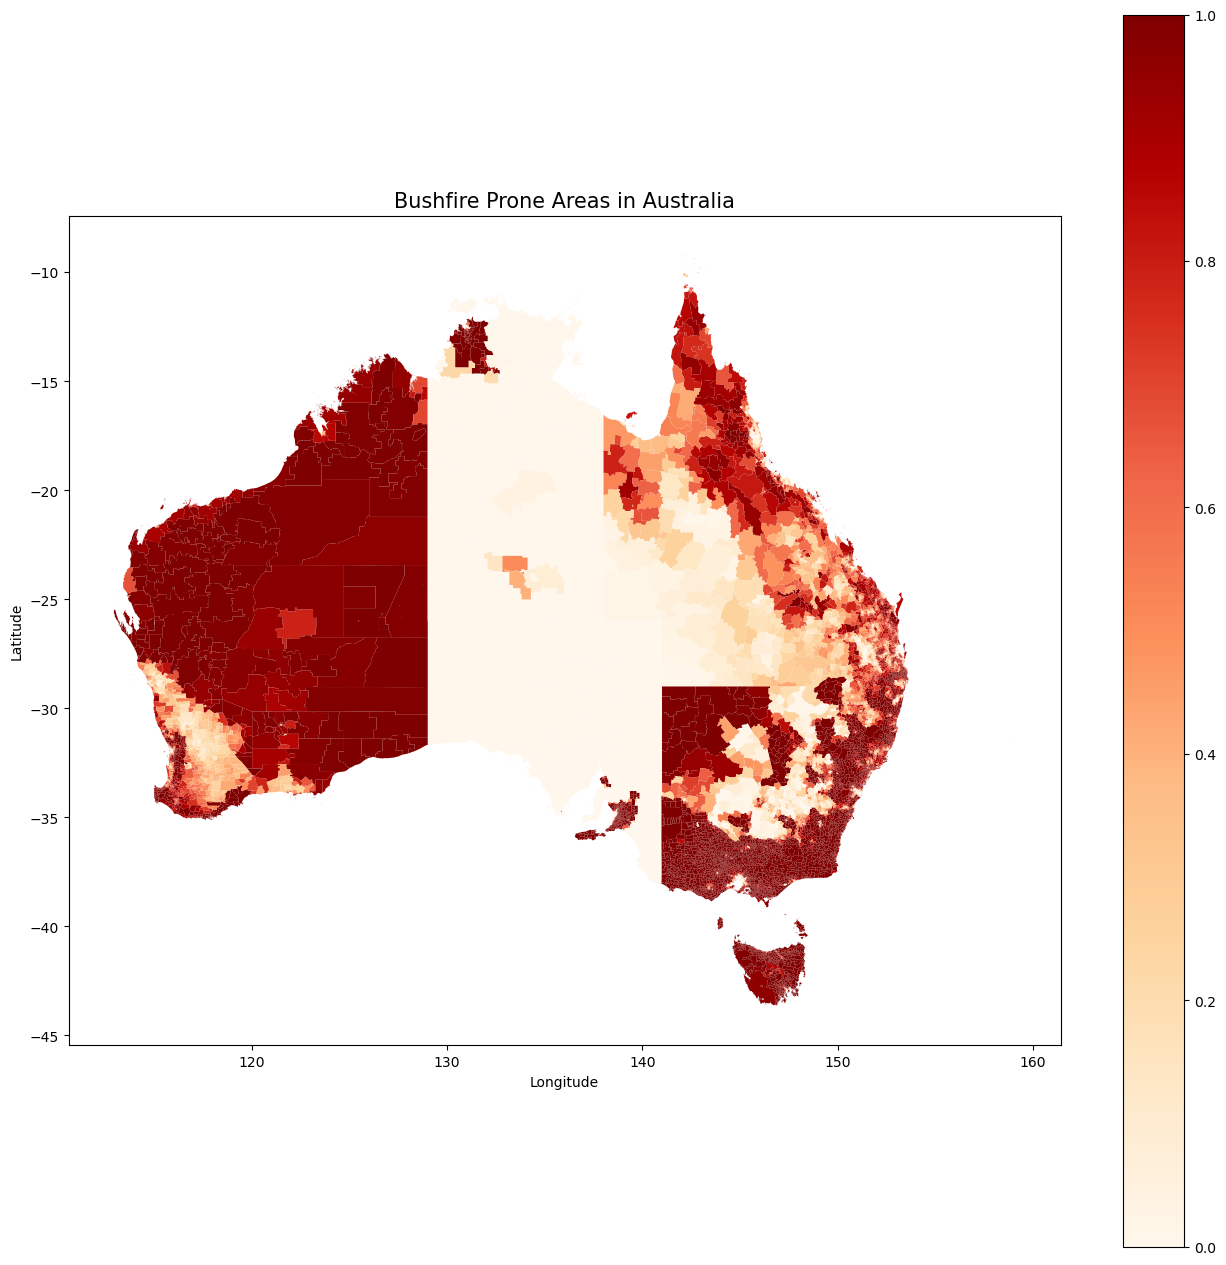

In [179]:
# Now I can plot the data

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(16, 16))

# Plot the merged data with the legend enabled
df_submapmerge.plot(column='bf_area_pct', ax=ax, legend=True,
            cmap='OrRd', missing_kwds={'color': 'lightgrey'})

# Add titles and labels
ax.set_title('Bushfire Prone Areas in Australia', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set the legend title after the plot
if ax.get_legend() is not None:
    legend = ax.get_legend()
    legend.set_title("Bushfire Percentage")
    for text in legend.get_texts():
        text.set_fontsize(10)  # Adjust the font size if needed

plt.show()

In [181]:
# That's a pretty neat plot!
# You can see how each state/territory has their own guidance on identifying bushfir prone areas (sudden cut offs e.g. WA and NT)
# SA thinks it's pretty safe!
# TAS - everywhere is dangerous!
# QLD and NSW seemed fairly aligned in their thinking.

## Prepare bushfire prone areas df and the fires_df datasets for merging

In [184]:
# Recap the column headings
df_fires.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
6188508,-41.59365,147.95337,Albion Heights,TAS,208.00,0.37,0.58,2020-01-01,315,l,323.88,123.55,D,0
6188509,-41.58858,147.94402,Albion Heights,TAS,345.33,0.37,0.58,2020-01-01,315,n,278.20,7.32,D,0
6188510,-41.58877,147.93979,Albion Heights,TAS,342.41,0.37,0.58,2020-01-01,315,n,274.35,7.32,D,0
6188511,-41.58933,147.92732,Albion Heights,TAS,344.41,0.37,0.58,2020-01-01,315,n,272.76,5.95,D,0
6188512,-41.58952,147.92308,Albion Heights,TAS,346.83,0.37,0.58,2020-01-01,315,n,274.62,5.95,D,0


In [186]:
# I'm going to filter on NSW and QLD only as the data I have is too large and crashing my laptop further in this notebook
df_fires = df_fires[(df_fires['state'] == 'NSW') | (df_fires['state'] == 'QLD')]
df_fires.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
6188714,-37.68088,148.33893,Tyrolean,NSW,337.38,0.33,0.55,2020-01-01,316,n,292.26,29.46,D,0
6188715,-37.69596,148.11073,Tyrolean,NSW,335.71,0.33,0.56,2020-01-01,316,n,291.51,3.73,D,0
6188716,-37.67988,148.35378,Tyrolean,NSW,356.86,0.32,0.55,2020-01-01,316,l,296.38,11.58,D,0
6188717,-37.68037,148.34647,Tyrolean,NSW,356.86,0.32,0.55,2020-01-01,316,l,305.54,36.48,D,0
6188718,-37.68062,148.34273,Tyrolean,NSW,356.70,0.33,0.55,2020-01-01,316,l,299.89,36.48,D,0


In [188]:
df_fires_sorted = df_fires.sort_values(by='suburb')
df_fires.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
6188714,-37.68088,148.33893,Tyrolean,NSW,337.38,0.33,0.55,2020-01-01,316,n,292.26,29.46,D,0
6188715,-37.69596,148.11073,Tyrolean,NSW,335.71,0.33,0.56,2020-01-01,316,n,291.51,3.73,D,0
6188716,-37.67988,148.35378,Tyrolean,NSW,356.86,0.32,0.55,2020-01-01,316,l,296.38,11.58,D,0
6188717,-37.68037,148.34647,Tyrolean,NSW,356.86,0.32,0.55,2020-01-01,316,l,305.54,36.48,D,0
6188718,-37.68062,148.34273,Tyrolean,NSW,356.70,0.33,0.55,2020-01-01,316,l,299.89,36.48,D,0


In [190]:
unique_states = df_fires['state'].unique()
unique_states

array(['NSW', 'QLD'], dtype=object)

In [192]:
unique_suburbs = df_fires['suburb'].unique()
unique_suburbs

array(['Tyrolean', 'Wallaga Lake Heights', 'Catalina Heights', 'Kimovale',
       'Jackalass', 'Bungalow Park', 'Capertee', 'Inveralochy',
       'Eastgrove', 'Port Kembla North', 'Bradfordville', 'Jenolan Caves',
       'Lemongrove', 'Darnick', 'Strathlone', 'Currawong Beach',
       'Cliftonville', 'Combo', 'Satur', 'Central Lansdowne',
       'Gordon Brook', 'Old Koreelah', 'Newells Creek', 'Kolodong',
       'Kookaburra', 'Lower Taylors Arm', 'Five Day Creek', 'Newling',
       'Paddys Plain', 'West Armidale', 'Albion Hill', 'Narrabri West',
       'Ross Hill', 'Toowoomba', 'Brisbane', 'Bundaberg', 'Hervey Bay',
       'Rockhampton', 'Bootooloo', 'Townsville', 'Cairns', 'Kubin',
       'St Patricks', 'Dalman', 'Waddi', 'Wamoon', 'Durras Lake',
       'Kemblawarra', 'Macdonaldtown', 'Ben Venue', 'Wonboyn Lake',
       'Dunheved', 'Hawthorneville', 'Timmsvale', 'Junee North',
       'Morongla Creek', 'Churchill Gardens', 'Equus', 'Bletchington',
       'Frampton', 'St Pauls', 'Noonbi

In [194]:
df_fires.shape

(1443167, 14)

In [196]:
df_fires.sample(10)

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
10245299,-18.48549,142.65738,Cairns,QLD,367.00,0.45,0.63,2023-11-15,450,h,312.06,19.17,D,0
8238536,-14.78098,141.83928,Cairns,QLD,342.45,0.40,0.37,2022-06-29,401,n,291.08,3.83,D,0
9063367,-15.50923,141.85820,Cairns,QLD,314.45,0.45,0.39,2023-06-24,1601,n,289.57,1.05,N,0
8097644,-34.57715,146.35974,Wamoon,NSW,336.93,0.40,0.60,2022-05-09,451,n,294.04,12.85,D,0
8780137,-35.64408,146.32365,Waddi,NSW,338.41,0.62,0.54,2023-04-21,447,n,292.72,5.30,D,0
9570457,-32.41314,146.17065,Wamoon,NSW,297.38,0.57,0.43,2023-10-07,1455,n,283.11,1.79,N,0
8174416,-24.84916,147.21495,Rockhampton,QLD,335.45,0.44,0.38,2022-06-02,403,n,293.80,3.53,D,0
10515679,-21.22634,139.82939,Townsville,QLD,356.19,0.44,0.39,2024-01-03,431,n,316.46,33.03,D,0
9446808,-24.04250,149.16974,Rockhampton,QLD,342.56,0.32,0.55,2023-09-28,308,n,300.69,7.53,D,0
8855001,-27.77562,151.55714,Toowoomba,QLD,354.96,0.53,0.50,2023-05-09,411,n,297.18,15.54,D,0


In [198]:
# Get unique values and sort them alphabetically
unique_suburbs = df_fires['suburb'].unique()
sorted_unique_suburbs = sorted(unique_suburbs)

# Print the sorted unique values
for suburb in sorted_unique_suburbs:
    print(suburb)

Akuna Bay
Albion Hill
Allambie
Amity Point
Ammerdown
Apollo
Aurville
Bantry Bay
Barra Brui
Bayldon
Ben Venue
Bletchington
Bootooloo
Bradfordville
Briggsvale
Brisbane
Bundaberg
Bundgeam
Bungalow Park
Bungaroo
Cairns
Capertee
Catalina Heights
Central Lansdowne
Churchill Gardens
Cliftonville
Coba Point
Combo
Cromer Heights
Currawong Beach
Dalman
Darnick
Delroy Gardens
Dovedale
Dunheved
Durras Lake
Eastgrove
Equus
Firgrove
Five Day Creek
Forster Keys
Frampton
Fridays Creek
Gordon Brook
Hawthorneville
Hervey Bay
Ifield
Ingleside Heights
Inveralochy
Jackalass
Jenolan Caves
Junee North
Kemblawarra
Kimovale
Kolodong
Kookaburra
Kubin
Lemongrove
Lower Taylors Arm
Macdonaldtown
Manera Heights
McCarrs Creek
Morongla Creek
Mount Lion
Narrabri West
Narrambla
Newells Creek
Newling
Noonbinna
North Creek
North Goulburn
North Hill
North Pindimar
North St Ives
Northmeadow
Old Koreelah
Ophir Glen
Paddys Plain
Peach Trees
Pipers Bay
Pipers Flat
Port Kembla North
Rockhampton
Ross Hill
Round Corner
Satur
Sou

In [200]:
df_submapmerge.head()

,suburb,state,geometry,area,bf_area,bf_area_pct,cent_lat,cent_lon
0,Aarons Pass,New South Wales,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8...",82.838001,82.836363,0.999980,-32.879095,149.802886
1,Abbotsbury,New South Wales,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8...",4.990238,3.631997,0.727820,-33.870090,150.861204
2,Abbotsford (NSW),New South Wales,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8...",1.020724,NaN,0.000000,-33.850609,151.129240
3,Abercrombie,New South Wales,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39...",2.979366,NaN,0.000000,-33.389973,149.556430
4,Abercrombie River,New South Wales,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9...",127.216092,96.500314,0.758554,-33.910332,149.347661


In [202]:
# Get unique values and sort them alphabetically
unique_states = df_submapmerge['state'].unique()
unique_states


array(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory'], dtype=object)

In [204]:
# Filter the dataset as before
df_submapmerge = df_submapmerge.loc[df_submapmerge['state'].isin(['New South Wales', 'Queensland'])]

In [206]:
# Get unique values and sort them alphabetically
unique_states = df_submapmerge['state'].unique()
unique_states

array(['New South Wales', 'Queensland'], dtype=object)

In [208]:
df_submapmerge.shape


(7775, 8)

In [214]:
df_submapmerge.sample(10)

,suburb,state,geometry,area,bf_area,bf_area_pct,cent_lat,cent_lon
1218,Dartbrook,New South Wales,"POLYGON ((150.76658 -32.17103, 150.77082 -32.1...",57.272589,56.948184,0.994336,-32.151214,150.820905
7678,Beaudesert,Queensland,"POLYGON ((152.98721 -27.99955, 152.98479 -28.0...",43.963643,18.102148,0.411753,-27.988144,153.001900
1919,Hillville,New South Wales,"POLYGON ((152.37501 -31.98756, 152.37587 -31.9...",43.013520,34.080612,0.792323,-31.980766,152.340223
9447,Mount Fox,Queensland,"POLYGON ((145.80199 -18.74904, 145.80183 -18.7...",138.654153,127.839327,0.922001,-18.821112,145.857335
7721,Bentley Park,Queensland,"POLYGON ((145.72814 -17.01349, 145.7278 -17.01...",6.857010,2.311881,0.337156,-17.008308,145.722183
7715,Benaraby,Queensland,"POLYGON ((151.34081 -24.00549, 151.34228 -24.0...",106.101240,81.185519,0.765170,-24.043980,151.303653
2848,Mundarlo,New South Wales,"POLYGON ((147.73655 -35.0679, 147.7375 -35.068...",174.005535,65.862555,0.378508,-35.126561,147.821489
3644,St Albans (NSW),New South Wales,"POLYGON ((151.10681 -33.23124, 151.10661 -33.2...",107.716305,107.658040,0.999459,-33.251783,151.007531
4061,Upper Rouchel,New South Wales,"POLYGON ((151.23908 -32.05551, 151.23914 -32.0...",248.738069,248.738069,1.000000,-32.098321,151.192623
10161,Stratford (Qld),Queensland,"POLYGON ((145.73145 -16.87932, 145.73134 -16.8...",2.056423,1.462866,0.711364,-16.878697,145.730317


In [212]:
# Get unique values and sort them alphabetically
unique_suburbs = df_submapmerge['suburb'].unique()
sorted_unique_suburbs = sorted(unique_suburbs)

# Print the sorted unique values
for suburb in sorted_unique_suburbs:
    print(suburb)

Aarons Pass
Abbeywood
Abbotsbury
Abbotsford (NSW)
Abbotsford (Qld)
Abercorn
Abercrombie
Abercrombie River
Aberdare
Aberdeen (NSW)
Aberfoyle
Aberglasslyn
Abergowrie
Abermain
Abernethy
Abingdon Downs
Abington (NSW)
Abington (Qld)
Acacia Creek
Acacia Gardens
Acacia Ridge
Acland
Adaminaby
Adamstown
Adamstown Heights
Adare
Adavale
Adelaide Park
Adelong
Adjungbilly
Advancetown
Aeroglen
Afterlee
Agnes Banks
Agnes Water
Airdmillan
Airds
Airlie Beach
Airville
Aitkenvale
Akolele
Alabama Hill
Albany Creek
Albert
Alberta
Alberton (Qld)
Albinia
Albion (Brisbane - Qld)
Albion (Richmond - Qld)
Albion Park
Albion Park Rail
Albury
Aldavilla
Alderley
Aldershot
Aldoga
Alectown
Alexandra (Qld)
Alexandra Headland
Alexandra Hills
Alexandria
Alfords Point
Alfredtown
Algester
Alice
Alice Creek
Alice River
Alison (Central Coast - NSW)
Alison (Dungog - NSW)
Allambie Heights
Allan
Allandale (NSW)
Allandale (Qld)
Allawah
Alleena
Allenstown
Allenview
Allgomera
Alligator Creek (Mackay - Qld)
Alligator Creek (Townsv

In [216]:
# We can see that some suburbs also contain State information (which is repeated in the state column)
# So we can remove the unwanted State info from the suburb names

# Remove the state information
df_submapmerge.loc[:, 'suburb'] = df_submapmerge['suburb'].str.strip()
df_submapmerge.loc[:, 'suburb'] = df_submapmerge['suburb'].str.replace(r'\s*\(.*?\)', '', regex=True)


In [218]:
# Get unique values and sort them alphabetically
unique_suburbs = df_submapmerge['suburb'].unique()
sorted_unique_suburbs = sorted(unique_suburbs)

# Print the sorted unique values
for suburb in sorted_unique_suburbs:
    print(suburb)

Aarons Pass
Abbeywood
Abbotsbury
Abbotsford
Abercorn
Abercrombie
Abercrombie River
Aberdare
Aberdeen
Aberfoyle
Aberglasslyn
Abergowrie
Abermain
Abernethy
Abingdon Downs
Abington
Acacia Creek
Acacia Gardens
Acacia Ridge
Acland
Adaminaby
Adamstown
Adamstown Heights
Adare
Adavale
Adelaide Park
Adelong
Adjungbilly
Advancetown
Aeroglen
Afterlee
Agnes Banks
Agnes Water
Airdmillan
Airds
Airlie Beach
Airville
Aitkenvale
Akolele
Alabama Hill
Albany Creek
Albert
Alberta
Alberton
Albinia
Albion
Albion Park
Albion Park Rail
Albury
Aldavilla
Alderley
Aldershot
Aldoga
Alectown
Alexandra
Alexandra Headland
Alexandra Hills
Alexandria
Alfords Point
Alfredtown
Algester
Alice
Alice Creek
Alice River
Alison
Allambie Heights
Allan
Allandale
Allawah
Alleena
Allenstown
Allenview
Allgomera
Alligator Creek
Allora
Alloway
Allworth
Allynbrook
Alma Park
Almaden
Aloomba
Alpha
Alpine
Alsace
Alstonvale
Alstonville
Alton Downs
Alumy Creek
Alva
Amamoor
Amamoor Creek
Amaroo
Ambarvale
Amber
Amberley
Ambrose
Amby
Amiens


In [220]:
# Worked - now onto the merging with the bushfire dataset.  
# This should give me a dataset with the bushfires, their suburb / State and the bushfire prone %age

In [222]:
# Checking the data is clean before merging

In [224]:
# Check for missing values
print(df_fires['suburb'].isnull().sum())
print(df_submapmerge['suburb'].isnull().sum())

0
0


In [226]:
# No missing values - good start ;-)

In [228]:
# Standardise case
df_fires.loc[:, 'suburb'] = df_fires['suburb'].str.lower()
df_submapmerge.loc[:, 'suburb'] = df_submapmerge['suburb'].str.lower()

In [230]:
# Trim whitespace
df_fires.loc[:, 'suburb'] = df_fires['suburb'].str.strip()
df_submapmerge.loc[:, 'suburb'] = df_submapmerge['suburb'].str.strip()

In [232]:
# Identify potential mismatches
all_included = df_fires['suburb'].isin(df_submapmerge['suburb']).all()

In [234]:
if all_included:
    print("All suburbs in df_fires are included in df_submapmerge.")
else:
    print("Not all suburbs in df_fires are included in df_submapmerge.")

Not all suburbs in df_fires are included in df_submapmerge.


In [236]:
# Identify suburbs in df_fires that are not in df_submapmerge
unique_non_matching = df_fires[~df_fires['suburb'].isin(df_submapmerge['suburb'])]

# Print the result
print("\nSuburbs in df_fires not in df_submapmerge:")
print(unique_non_matching)


Suburbs in df_fires not in df_submapmerge:
          latitude  longitude    suburb state  brightness  scan  track  \
6188714  -37.68088  148.33893  tyrolean   NSW      337.38  0.33   0.55   
6188715  -37.69596  148.11073  tyrolean   NSW      335.71  0.33   0.56   
6188716  -37.67988  148.35378  tyrolean   NSW      356.86  0.32   0.55   
6188717  -37.68037  148.34647  tyrolean   NSW      356.86  0.32   0.55   
6188718  -37.68062  148.34273  tyrolean   NSW      356.70  0.33   0.55   
...            ...        ...       ...   ...         ...   ...    ...   
10673029 -36.58669  147.07611  tyrolean   NSW      299.94  0.38   0.43   
10673030 -36.58960  147.06430  tyrolean   NSW      321.11  0.57   0.43   
10673031 -36.59070  147.07497  tyrolean   NSW      312.39  0.38   0.43   
10673032 -36.59278  147.05518  tyrolean   NSW      333.14  0.57   0.43   
10673033 -36.59356  147.06270  tyrolean   NSW      320.99  0.57   0.43   

            acq_date  acq_time confidence  bright_t31    frp daynig

In [238]:
# How many of these are unique though?
unique_non_matching = unique_non_matching['suburb'].unique()
print(unique_non_matching)

['tyrolean' 'wallaga lake heights' 'catalina heights' 'kimovale'
 'jackalass' 'bungalow park' 'inveralochy' 'eastgrove' 'port kembla north'
 'bradfordville' 'jenolan caves' 'lemongrove' 'darnick' 'strathlone'
 'currawong beach' 'cliftonville' 'combo' 'satur' 'central lansdowne'
 'gordon brook' 'old koreelah' 'newells creek' 'kolodong' 'kookaburra'
 'lower taylors arm' 'five day creek' 'newling' 'paddys plain'
 'west armidale' 'albion hill' 'narrabri west' 'ross hill' 'toowoomba'
 'brisbane' 'bundaberg' 'hervey bay' 'rockhampton' 'bootooloo'
 'townsville' 'cairns' 'kubin' 'st patricks' 'dalman' 'waddi' 'wamoon'
 'durras lake' 'kemblawarra' 'macdonaldtown' 'ben venue' 'wonboyn lake'
 'dunheved' 'hawthorneville' 'timmsvale' 'junee north' 'morongla creek'
 'churchill gardens' 'equus' 'bletchington' 'frampton' 'st pauls'
 'noonbinna' 'bundgeam' 'wongavale' 'firgrove' 'ammerdown' 'yarandale'
 'mount lion' 'northmeadow' 'briggsvale' 'bayldon' 'north pindimar'
 'fridays creek' 'amity point' 'd

In [240]:
# I can replace the suburbs in the df_fires dataset that are missing from the bushfire prone dataset with the nearest suburb that IS in the bushfire prone dataset.
# This will still be a good approximation of the %age bush fire prone land in that area
# I will limit the replacement to suburbs within 10km

In [242]:
# Read in the missing suburbs dataset

missing_suburb_path = "C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\missing_suburbs_filtered.xlsx"

# Read the Excel file
df_missubs = pd.read_excel(missing_suburb_path)
df_missubs.head()

,suburb,state,lat,lon
0,Acacia Park,NSW,-30.540396,151.680455
1,Akuna Bay,NSW,-33.648331,151.234445
2,Albion Hill,NSW,-29.781666,151.134437
3,Allambie,NSW,-33.773327,151.259444
4,Amity Point,QLD,-27.401394,153.441129


In [244]:
# Standardise case
df_missubs['suburb'] = df_missubs['suburb'].str.lower()

# Trim whitespace
df_fires['suburb'] = df_fires['suburb'].str.strip()

df_missubs

,suburb,state,lat,lon
0,acacia park,NSW,-30.540396,151.680455
1,akuna bay,NSW,-33.648331,151.234445
2,albion hill,NSW,-29.781666,151.134437
3,allambie,NSW,-33.773327,151.259444
4,amity point,QLD,-27.401394,153.441129
...,...,...,...,...
102,west armidale,NSW,-30.508056,151.645833
103,westlawn,NSW,-29.678581,152.921144
104,wonboyn lake,NSW,-37.250783,149.912558
105,wongavale,NSW,-28.698333,153.151111


In [246]:
from geopy.distance import great_circle
from tqdm import tqdm  # For the progress bar

# Initialize a list to hold the mapped suburbs
mapped_suburbs = []

# Use tqdm to show progress
for index, row in tqdm(df_missubs.iterrows(), total=df_missubs.shape[0]):
    fire_location = (row['lat'], row['lon'])
    
    # Calculate distances to all suburbs in df_submapmerge
    distances = df_submapmerge.apply(
        lambda x: great_circle(fire_location, (x['cent_lat'], x['cent_lon'])).km, 
        axis=1
    )
    
    # Filter for suburbs within 10 km
    nearby_suburbs = distances[distances <= 10]
    
    if not nearby_suburbs.empty:
        # Find the index of the minimum distance among the nearby suburbs
        nearest_index = nearby_suburbs.idxmin()
        # Append the nearest suburb to the mapped_suburbs list
        mapped_suburbs.append(df_submapmerge.at[nearest_index, 'suburb'])
    else:
        # No suburb found within 10 km
        mapped_suburbs.append("Not Found")

# Add the mapped suburbs back to the df_missubs DataFrame
df_missubs['mapped_suburb'] = mapped_suburbs

df_missubs.head()

100%|██████████| 107/107 [00:36<00:00,  2.95it/s]


,suburb,state,lat,lon,mapped_suburb
0,acacia park,NSW,-30.540396,151.680455,armidale
1,akuna bay,NSW,-33.648331,151.234445,ku-ring-gai chase
2,albion hill,NSW,-29.781666,151.134437,inverell
3,allambie,NSW,-33.773327,151.259444,allambie heights
4,amity point,QLD,-27.401394,153.441129,amity


In [248]:
df_missubs.head(15)

,suburb,state,lat,lon,mapped_suburb
0,acacia park,NSW,-30.540396,151.680455,armidale
1,akuna bay,NSW,-33.648331,151.234445,ku-ring-gai chase
2,albion hill,NSW,-29.781666,151.134437,inverell
3,allambie,NSW,-33.773327,151.259444,allambie heights
4,amity point,QLD,-27.401394,153.441129,amity
5,ammerdown,NSW,-33.246048,149.071452,orange
6,apollo,NSW,-32.231611,148.634274,dubbo
7,aurville,NSW,-34.545677,148.364624,harden
8,bantry bay,NSW,-33.758443,151.230411,frenchs forest
9,barra brui,NSW,-33.748333,151.167778,east killara


In [250]:
unique_states = df_missubs['state'].unique()
unique_states

array(['NSW', 'QLD'], dtype=object)

In [252]:
# I checked a few on Google Maps and they look okay.

In [254]:
# Count occurrences of each value in the 'mapped_suburb' column
not_found_count = df_missubs['mapped_suburb'].value_counts().get("Not Found", 0)

print(not_found_count)

4


In [256]:
# Delete rows where the suburb was not found as the data will not be available
not_found_suburbs = df_missubs[df_missubs['mapped_suburb'].isna()]['suburb'].tolist()
not_found_set = set(not_found_suburbs)

In [258]:
df_fires_cleaned = df_fires[~df_fires['suburb'].isin(not_found_set)]

In [260]:
df_fires_cleaned.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
6188714,-37.68088,148.33893,tyrolean,NSW,337.38,0.33,0.55,2020-01-01,316,n,292.26,29.46,D,0
6188715,-37.69596,148.11073,tyrolean,NSW,335.71,0.33,0.56,2020-01-01,316,n,291.51,3.73,D,0
6188716,-37.67988,148.35378,tyrolean,NSW,356.86,0.32,0.55,2020-01-01,316,l,296.38,11.58,D,0
6188717,-37.68037,148.34647,tyrolean,NSW,356.86,0.32,0.55,2020-01-01,316,l,305.54,36.48,D,0
6188718,-37.68062,148.34273,tyrolean,NSW,356.70,0.33,0.55,2020-01-01,316,l,299.89,36.48,D,0


In [262]:
# I can use the df_missubs mapping to map back into the df_fires data

# Create a mapping from the missing suburbs to the mapped suburbs
mapping = df_missubs.set_index('suburb')['mapped_suburb'].to_dict()

# Update df_fires_cleaned with the mapped suburbs where the suburb was originally missing
for index, row in tqdm(df_fires_cleaned.iterrows(), total=df_fires_cleaned.shape[0], desc="Updating suburbs"):
    if row['suburb'] in mapping:
        df_fires_cleaned.at[index, 'suburb'] = mapping[row['suburb']]

df_fires_cleaned.head()

Updating suburbs: 100%|██████████| 1443167/1443167 [03:15<00:00, 7364.96it/s] 


,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
6188714,-37.68088,148.33893,east jindabyne,NSW,337.38,0.33,0.55,2020-01-01,316,n,292.26,29.46,D,0
6188715,-37.69596,148.11073,east jindabyne,NSW,335.71,0.33,0.56,2020-01-01,316,n,291.51,3.73,D,0
6188716,-37.67988,148.35378,east jindabyne,NSW,356.86,0.32,0.55,2020-01-01,316,l,296.38,11.58,D,0
6188717,-37.68037,148.34647,east jindabyne,NSW,356.86,0.32,0.55,2020-01-01,316,l,305.54,36.48,D,0
6188718,-37.68062,148.34273,east jindabyne,NSW,356.70,0.33,0.55,2020-01-01,316,l,299.89,36.48,D,0


In [264]:
# Check Allambie: Allambie was mapped to Allambie Heights above
allambie_rows = df_fires_cleaned[df_fires_cleaned['suburb'] == 'allambie heights']
print(allambie_rows)

         latitude  longitude            suburb state  brightness  scan  track  \
7436495 -33.77329  151.25508  allambie heights   NSW      342.10  0.36   0.57   
7519731 -33.81646  151.26233  allambie heights   NSW      367.00  0.36   0.57   
7519732 -33.81333  151.26379  allambie heights   NSW      326.60  0.36   0.57   
7519733 -33.81426  151.26007  allambie heights   NSW      343.90  0.36   0.57   
8608076 -33.76977  151.24998  allambie heights   NSW      345.48  0.51   0.49   
8608694 -33.77394  151.24504  allambie heights   NSW      302.68  0.42   0.45   
8608695 -33.77467  151.24712  allambie heights   NSW      306.25  0.42   0.45   
8610022 -33.77340  151.24870  allambie heights   NSW      306.52  0.37   0.58   
8610023 -33.77439  151.25259  allambie heights   NSW      297.33  0.37   0.58   
8978311 -33.80716  151.27628  allambie heights   NSW      341.18  0.42   0.61   

           acq_date  acq_time confidence  bright_t31   frp daynight  type  
7436495  2021-08-22       427   

In [266]:
# Identify potential mismatches
all_included = df_fires_cleaned['suburb'].isin(df_submapmerge['suburb']).all()

In [268]:
if all_included:
    print("All suburbs in df_fires_cleaned are included in df_submapmerge.")
else:
    print("Not all suburbs in df_fires_cleaned are included in df_submapmerge.")

Not all suburbs in df_fires_cleaned are included in df_submapmerge.


In [270]:
# Identify suburbs in df_fires_cleaned that are not in df_submapmerge
unique_non_matching = df_fires_cleaned[~df_fires_cleaned['suburb'].isin(df_submapmerge['suburb'])]

# Print the result
print("\nSuburbs in df_fires_cleaned not in df_submapmerge:")
print(unique_non_matching)


Suburbs in df_fires_cleaned not in df_submapmerge:
          latitude  longitude     suburb state  brightness  scan  track  \
6191382  -34.00410  142.26663  Not Found   NSW      341.88  0.66   0.73   
6191383  -34.00430  142.25914  Not Found   NSW      343.42  0.66   0.73   
6191384  -33.99716  142.26639  Not Found   NSW      347.22  0.66   0.73   
6191385  -34.00553  142.25914  Not Found   NSW      341.74  0.66   0.73   
6191386  -33.99834  142.26643  Not Found   NSW      367.00  0.66   0.73   
...            ...        ...        ...   ...         ...   ...    ...   
10673005 -34.30646  146.01726  Not Found   NSW      303.28  0.49   0.40   
10673010 -34.60411  142.76363  Not Found   NSW      323.86  0.39   0.36   
10673011 -35.32154  145.42647  Not Found   NSW      295.32  0.47   0.40   
10673012 -35.32523  145.42581  Not Found   NSW      296.47  0.47   0.40   
10673027 -36.02044  145.90845  Not Found   NSW      309.53  0.50   0.41   

            acq_date  acq_time confidence  brig

In [272]:
# These are where the suburb was not found and I won't have data.  They can be deleted.
df_fires_cleaned = df_fires_cleaned[df_fires_cleaned['suburb'] != 'Not Found']

df_fires_cleaned.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
6188714,-37.68088,148.33893,east jindabyne,NSW,337.38,0.33,0.55,2020-01-01,316,n,292.26,29.46,D,0
6188715,-37.69596,148.11073,east jindabyne,NSW,335.71,0.33,0.56,2020-01-01,316,n,291.51,3.73,D,0
6188716,-37.67988,148.35378,east jindabyne,NSW,356.86,0.32,0.55,2020-01-01,316,l,296.38,11.58,D,0
6188717,-37.68037,148.34647,east jindabyne,NSW,356.86,0.32,0.55,2020-01-01,316,l,305.54,36.48,D,0
6188718,-37.68062,148.34273,east jindabyne,NSW,356.70,0.33,0.55,2020-01-01,316,l,299.89,36.48,D,0


In [274]:
# Identify potential mismatches
all_included = df_fires_cleaned['suburb'].isin(df_submapmerge['suburb']).all()

In [276]:
if all_included:
    print("All suburbs in df_fires_cleaned are included in df_submapmerge.")
else:
    print("Not all suburbs in df_fires_cleaned are included in df_submapmerge.")

All suburbs in df_fires_cleaned are included in df_submapmerge.


In [278]:
# Finally!  Two weeks of work to get to this point. SAVE

In [280]:
df_fires_cleaned.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
6188714,-37.68088,148.33893,east jindabyne,NSW,337.38,0.33,0.55,2020-01-01,316,n,292.26,29.46,D,0
6188715,-37.69596,148.11073,east jindabyne,NSW,335.71,0.33,0.56,2020-01-01,316,n,291.51,3.73,D,0
6188716,-37.67988,148.35378,east jindabyne,NSW,356.86,0.32,0.55,2020-01-01,316,l,296.38,11.58,D,0
6188717,-37.68037,148.34647,east jindabyne,NSW,356.86,0.32,0.55,2020-01-01,316,l,305.54,36.48,D,0
6188718,-37.68062,148.34273,east jindabyne,NSW,356.70,0.33,0.55,2020-01-01,316,l,299.89,36.48,D,0


In [282]:
df_fires_cleaned_sorted = df_fires_cleaned.sort_values(by='suburb')
df_fires_cleaned_sorted.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
7519733,-33.81426,151.26007,allambie heights,NSW,343.90,0.36,0.57,2021-09-23,427,n,292.67,2.69,D,3
7519732,-33.81333,151.26379,allambie heights,NSW,326.60,0.36,0.57,2021-09-23,427,n,294.45,4.18,D,3
7519731,-33.81646,151.26233,allambie heights,NSW,367.00,0.36,0.57,2021-09-23,427,h,295.27,3.98,D,3
8608076,-33.76977,151.24998,allambie heights,NSW,345.48,0.51,0.49,2022-12-03,312,n,295.85,5.49,D,0
8608695,-33.77467,151.24712,allambie heights,NSW,306.25,0.42,0.45,2022-12-03,1431,n,284.91,0.85,N,0


In [284]:
# I want quality over quantity, so the rows where 'confidence' is low is poorer quality data
# I will filter for just nominal and high confidence

df_fires_cleaned = df_fires_cleaned[((df_fires_cleaned['confidence'] == 'n') | (df_fires_cleaned['confidence'] == 'h'))]
print ('Day time detection with normal and high confidence contains %i records' %  len(df_fires_cleaned))

Day time detection with normal and high confidence contains 1224891 records


In [286]:
# That's still plenty of data to work with

In [288]:
df_fires_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224891 entries, 6188714 to 10673033
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   latitude    1224891 non-null  float64
 1   longitude   1224891 non-null  float64
 2   suburb      1224891 non-null  object 
 3   state       1224891 non-null  object 
 4   brightness  1224891 non-null  float64
 5   scan        1224891 non-null  float64
 6   track       1224891 non-null  float64
 7   acq_date    1224891 non-null  object 
 8   acq_time    1224891 non-null  int64  
 9   confidence  1224891 non-null  object 
 10  bright_t31  1224891 non-null  float64
 11  frp         1224891 non-null  float64
 12  daynight    1224891 non-null  object 
 13  type        1224891 non-null  int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 140.2+ MB


In [290]:
df_submapmerge.head()

,suburb,state,geometry,area,bf_area,bf_area_pct,cent_lat,cent_lon
0,aarons pass,New South Wales,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8...",82.838001,82.836363,0.999980,-32.879095,149.802886
1,abbotsbury,New South Wales,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8...",4.990238,3.631997,0.727820,-33.870090,150.861204
2,abbotsford,New South Wales,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8...",1.020724,NaN,0.000000,-33.850609,151.129240
3,abercrombie,New South Wales,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39...",2.979366,NaN,0.000000,-33.389973,149.556430
4,abercrombie river,New South Wales,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9...",127.216092,96.500314,0.758554,-33.910332,149.347661


In [292]:
# I need to amend the 'state' in df_submapmerge to match the state in df_fires_cleaned. I can map them
# Create a mapping dictionary
state_mapping = {
    'New South Wales': 'NSW',
    'Victoria': 'VIC',
    'Queensland': 'QLD',
    'Northern Territory':'NT',
    'South Australia': 'SA',
    'Tasmania': 'TAS',
    'Western Australia': 'WA',
    'Australian Capital Territory': 'ACT'
   
}

# Replace the states using the mapping
df_submapmerge.loc[:, 'state'] = df_submapmerge['state'].replace(state_mapping)
df_submapmerge.head(10)

,suburb,state,geometry,area,bf_area,bf_area_pct,cent_lat,cent_lon
0,aarons pass,NSW,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8...",82.838001,82.836363,0.999980,-32.879095,149.802886
1,abbotsbury,NSW,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8...",4.990238,3.631997,0.727820,-33.870090,150.861204
2,abbotsford,NSW,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8...",1.020724,NaN,0.000000,-33.850609,151.129240
3,abercrombie,NSW,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39...",2.979366,NaN,0.000000,-33.389973,149.556430
4,abercrombie river,NSW,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9...",127.216092,96.500314,0.758554,-33.910332,149.347661
5,aberdare,NSW,"POLYGON ((151.37454 -32.83794, 151.37678 -32.8...",3.307145,1.969755,0.595606,-32.841122,151.381679
6,aberdeen,NSW,"POLYGON ((150.9479 -32.17615, 150.94816 -32.17...",41.737664,37.878445,0.907536,-32.173825,150.891608
7,aberfoyle,NSW,"POLYGON ((151.91697 -30.14801, 151.91698 -30.1...",342.140234,157.335582,0.459857,-30.236312,151.978606
8,aberglasslyn,NSW,"POLYGON ((151.5366 -32.7047, 151.53622 -32.704...",6.237801,3.103327,0.497503,-32.694869,151.533936
9,abermain,NSW,"POLYGON ((151.44437 -32.8087, 151.44429 -32.80...",15.435454,14.575296,0.944274,-32.819704,151.437210


## Merge Bushfire Areas and Fires datasets

In [295]:
# Merge the Bushfire prone areas and known fires DataFrames on suburb and state columns
merged_df = pd.merge(df_fires_cleaned, df_submapmerge, on=['suburb', 'state'], how='inner')
merged_df.head(10)

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type,geometry,area,bf_area,bf_area_pct,cent_lat,cent_lon
0,-37.68088,148.33893,east jindabyne,NSW,337.38,0.33,0.55,2020-01-01,316,n,292.26,29.46,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188
1,-37.69596,148.11073,east jindabyne,NSW,335.71,0.33,0.56,2020-01-01,316,n,291.51,3.73,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188
2,-37.67398,148.36411,east jindabyne,NSW,334.69,0.32,0.55,2020-01-01,316,n,290.74,9.80,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188
3,-37.67447,148.35681,east jindabyne,NSW,351.24,0.32,0.55,2020-01-01,316,n,291.95,10.00,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188
4,-37.67471,148.35323,east jindabyne,NSW,337.73,0.32,0.55,2020-01-01,316,n,289.47,11.58,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188
5,-37.67495,148.34964,east jindabyne,NSW,350.64,0.32,0.55,2020-01-01,316,n,291.32,11.58,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188
6,-37.67545,148.34219,east jindabyne,NSW,349.45,0.33,0.55,2020-01-01,316,n,299.22,36.48,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188
7,-37.67570,148.33839,east jindabyne,NSW,344.29,0.33,0.55,2020-01-01,316,n,305.56,29.46,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188
8,-37.67595,148.33461,east jindabyne,NSW,350.56,0.33,0.55,2020-01-01,316,n,292.38,29.46,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188
9,-37.67671,148.32323,east jindabyne,NSW,331.63,0.33,0.55,2020-01-01,316,n,290.34,1.38,D,0,"POLYGON ((148.64841 -36.37595, 148.65024 -36.3...",49.284451,42.130053,0.854835,-36.408482,148.664188


In [297]:
# Check for missing values
missing_values = merged_df.isnull().sum()

# Display missing values
print("Missing Values in Merged DataFrame:")
print(missing_values)

# Check the shape of the DataFrames
print("\nShape of df_fires_cleaned:", df_fires_cleaned.shape)
print("Shape of df_submapmerge:", df_submapmerge.shape)
print("Shape of merged_df:", merged_df.shape)

Missing Values in Merged DataFrame:
latitude            0
longitude           0
suburb              0
state               0
brightness          0
scan                0
track               0
acq_date            0
acq_time            0
confidence          0
bright_t31          0
frp                 0
daynight            0
type                0
geometry            0
area                0
bf_area        734478
bf_area_pct         0
cent_lat            0
cent_lon            0
dtype: int64

Shape of df_fires_cleaned: (1224891, 14)
Shape of df_submapmerge: (7775, 8)
Shape of merged_df: (1224891, 20)


In [299]:
print("Unique suburbs in df_fires_cleaned:", df_fires_cleaned['suburb'].nunique())
print("Unique suburbs in df_submapmerge:", df_submapmerge['suburb'].nunique())
print("Unique suburbs in merged_df:", merged_df['suburb'].nunique())

Unique suburbs in df_fires_cleaned: 82
Unique suburbs in df_submapmerge: 7397
Unique suburbs in merged_df: 82


In [301]:
# Looks like the merge was successful.
# Tidy it up and take a closer look at the merged data

In [303]:
# Now to tidy it up and remove some of the columns I don't need going forward
merged_df = merged_df.drop(columns=['geometry', 'cent_lat', 'cent_lon'])
merged_df.head()


,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,-37.68088,148.33893,east jindabyne,NSW,337.38,0.33,0.55,2020-01-01,316,n,292.26,29.46,D,0,49.284451,42.130053,0.854835
1,-37.69596,148.11073,east jindabyne,NSW,335.71,0.33,0.56,2020-01-01,316,n,291.51,3.73,D,0,49.284451,42.130053,0.854835
2,-37.67398,148.36411,east jindabyne,NSW,334.69,0.32,0.55,2020-01-01,316,n,290.74,9.80,D,0,49.284451,42.130053,0.854835
3,-37.67447,148.35681,east jindabyne,NSW,351.24,0.32,0.55,2020-01-01,316,n,291.95,10.00,D,0,49.284451,42.130053,0.854835
4,-37.67471,148.35323,east jindabyne,NSW,337.73,0.32,0.55,2020-01-01,316,n,289.47,11.58,D,0,49.284451,42.130053,0.854835


In [305]:
merged_df.tail()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
1224886,-36.58669,147.07611,east jindabyne,NSW,299.94,0.38,0.43,2024-04-30,1534,n,278.41,1.71,N,0,49.284451,42.130053,0.854835
1224887,-36.58960,147.06430,east jindabyne,NSW,321.11,0.57,0.43,2024-04-30,1534,n,282.47,4.25,N,0,49.284451,42.130053,0.854835
1224888,-36.59070,147.07497,east jindabyne,NSW,312.39,0.38,0.43,2024-04-30,1534,n,280.93,1.71,N,0,49.284451,42.130053,0.854835
1224889,-36.59278,147.05518,east jindabyne,NSW,333.14,0.57,0.43,2024-04-30,1534,n,283.06,5.93,N,0,49.284451,42.130053,0.854835
1224890,-36.59356,147.06270,east jindabyne,NSW,320.99,0.57,0.43,2024-04-30,1534,n,281.57,5.93,N,0,49.284451,42.130053,0.854835


In [307]:
allambie_rows = merged_df[merged_df['suburb'] == 'allambie heights']
print(allambie_rows)

        latitude  longitude            suburb state  brightness  scan  track  \
431137 -33.77329  151.25508  allambie heights   NSW      342.10  0.36   0.57   
454659 -33.81646  151.26233  allambie heights   NSW      367.00  0.36   0.57   
454660 -33.81333  151.26379  allambie heights   NSW      326.60  0.36   0.57   
454661 -33.81426  151.26007  allambie heights   NSW      343.90  0.36   0.57   
730773 -33.76977  151.24998  allambie heights   NSW      345.48  0.51   0.49   
730898 -33.77394  151.24504  allambie heights   NSW      302.68  0.42   0.45   
730899 -33.77467  151.24712  allambie heights   NSW      306.25  0.42   0.45   
731090 -33.77340  151.24870  allambie heights   NSW      306.52  0.37   0.58   
731091 -33.77439  151.25259  allambie heights   NSW      297.33  0.37   0.58   
797491 -33.80716  151.27628  allambie heights   NSW      341.18  0.42   0.61   

          acq_date  acq_time confidence  bright_t31   frp daynight  type  \
431137  2021-08-22       427          n    

In [309]:
merged_df.describe()

,latitude,longitude,brightness,scan,track,acq_time,bright_t31,frp,type,area,bf_area,bf_area_pct
count,1.224891e+06,1.224891e+06,1.224891e+06,1.224891e+06,1.224891e+06,1.224891e+06,1.224891e+06,1.224891e+06,1.224891e+06,1.224891e+06,490413.000000,1.224891e+06
mean,-2.232564e+01,1.458289e+02,3.313911e+02,4.626672e-01,4.858220e-01,8.720491e+02,2.967694e+02,8.677785e+00,3.346094e-02,6.262001e+01,57.287215,1.440318e-01
std,7.209932e+00,4.067573e+00,2.021632e+01,8.935519e-02,1.168213e-01,5.666008e+02,1.045592e+01,1.625247e+01,2.603013e-01,1.567872e+02,94.965130,2.552124e-01
min,-3.813247e+01,1.365382e+02,2.950000e+02,3.200000e-01,3.600000e-01,2.280000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.221363e-01,0.011995,0.000000e+00
25%,-2.643653e+01,1.426283e+02,3.111600e+02,3.900000e-01,3.800000e-01,3.550000e+02,2.899300e+02,1.770000e+00,0.000000e+00,1.814375e+00,1.962684,0.000000e+00
50%,-2.053353e+01,1.453888e+02,3.353000e+02,4.400000e-01,4.500000e-01,4.400000e+02,2.956600e+02,4.590000e+00,0.000000e+00,2.606653e+00,43.242956,0.000000e+00
75%,-1.634907e+01,1.494928e+02,3.465100e+02,5.100000e-01,5.700000e-01,1.517000e+03,3.034200e+02,9.270000e+00,0.000000e+00,4.928445e+01,47.946340,2.791806e-01
max,-9.378610e+00,1.535971e+02,3.670000e+02,8.000000e-01,7.800000e-01,1.708000e+03,3.785500e+02,1.325440e+03,3.000000e+00,9.904630e+02,459.439840,1.000000e+00


In [311]:
merged_df.isnull().sum()

latitude            0
longitude           0
suburb              0
state               0
brightness          0
scan                0
track               0
acq_date            0
acq_time            0
confidence          0
bright_t31          0
frp                 0
daynight            0
type                0
area                0
bf_area        734478
bf_area_pct         0
dtype: int64

In [313]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224891 entries, 0 to 1224890
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   latitude     1224891 non-null  float64
 1   longitude    1224891 non-null  float64
 2   suburb       1224891 non-null  object 
 3   state        1224891 non-null  object 
 4   brightness   1224891 non-null  float64
 5   scan         1224891 non-null  float64
 6   track        1224891 non-null  float64
 7   acq_date     1224891 non-null  object 
 8   acq_time     1224891 non-null  int64  
 9   confidence   1224891 non-null  object 
 10  bright_t31   1224891 non-null  float64
 11  frp          1224891 non-null  float64
 12  daynight     1224891 non-null  object 
 13  type         1224891 non-null  int64  
 14  area         1224891 non-null  float64
 15  bf_area      490413 non-null   float64
 16  bf_area_pct  1224891 non-null  float64
dtypes: float64(10), int64(2), object(5)
memory usa

In [315]:
# Need to deal with some of the 'object' datatypes
from sklearn.preprocessing import LabelEncoder

In [317]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Apply label encoding to the 'confidence' column
merged_df['confidence'] = le.fit_transform(merged_df['confidence'])

# 0=h, 1=n

In [319]:
# Apply label encoding to the 'daynight' column
merged_df['daynight'] = le.fit_transform(merged_df['daynight'])

# 0=D, 1=N

In [321]:
merged_df.columns

Index(['latitude', 'longitude', 'suburb', 'state', 'brightness', 'scan',
       'track', 'acq_date', 'acq_time', 'confidence', 'bright_t31', 'frp',
       'daynight', 'type', 'area', 'bf_area', 'bf_area_pct'],
      dtype='object')

In [323]:
merged_df.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,-37.68088,148.33893,east jindabyne,NSW,337.38,0.33,0.55,2020-01-01,316,1,292.26,29.46,0,0,49.284451,42.130053,0.854835
1,-37.69596,148.11073,east jindabyne,NSW,335.71,0.33,0.56,2020-01-01,316,1,291.51,3.73,0,0,49.284451,42.130053,0.854835
2,-37.67398,148.36411,east jindabyne,NSW,334.69,0.32,0.55,2020-01-01,316,1,290.74,9.80,0,0,49.284451,42.130053,0.854835
3,-37.67447,148.35681,east jindabyne,NSW,351.24,0.32,0.55,2020-01-01,316,1,291.95,10.00,0,0,49.284451,42.130053,0.854835
4,-37.67471,148.35323,east jindabyne,NSW,337.73,0.32,0.55,2020-01-01,316,1,289.47,11.58,0,0,49.284451,42.130053,0.854835


In [325]:
unique_states = merged_df['state'].unique()
unique_states

array(['NSW', 'QLD'], dtype=object)

In [327]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224891 entries, 0 to 1224890
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   latitude     1224891 non-null  float64
 1   longitude    1224891 non-null  float64
 2   suburb       1224891 non-null  object 
 3   state        1224891 non-null  object 
 4   brightness   1224891 non-null  float64
 5   scan         1224891 non-null  float64
 6   track        1224891 non-null  float64
 7   acq_date     1224891 non-null  object 
 8   acq_time     1224891 non-null  int64  
 9   confidence   1224891 non-null  int32  
 10  bright_t31   1224891 non-null  float64
 11  frp          1224891 non-null  float64
 12  daynight     1224891 non-null  int32  
 13  type         1224891 non-null  int64  
 14  area         1224891 non-null  float64
 15  bf_area      490413 non-null   float64
 16  bf_area_pct  1224891 non-null  float64
dtypes: float64(10), int32(2), int64(2), object(3)


In [329]:
allambie_rows = merged_df[merged_df['suburb'] == 'allambie heights']
print(allambie_rows)

        latitude  longitude            suburb state  brightness  scan  track  \
431137 -33.77329  151.25508  allambie heights   NSW      342.10  0.36   0.57   
454659 -33.81646  151.26233  allambie heights   NSW      367.00  0.36   0.57   
454660 -33.81333  151.26379  allambie heights   NSW      326.60  0.36   0.57   
454661 -33.81426  151.26007  allambie heights   NSW      343.90  0.36   0.57   
730773 -33.76977  151.24998  allambie heights   NSW      345.48  0.51   0.49   
730898 -33.77394  151.24504  allambie heights   NSW      302.68  0.42   0.45   
730899 -33.77467  151.24712  allambie heights   NSW      306.25  0.42   0.45   
731090 -33.77340  151.24870  allambie heights   NSW      306.52  0.37   0.58   
731091 -33.77439  151.25259  allambie heights   NSW      297.33  0.37   0.58   
797491 -33.80716  151.27628  allambie heights   NSW      341.18  0.42   0.61   

          acq_date  acq_time  confidence  bright_t31   frp  daynight  type  \
431137  2021-08-22       427           1 

In [331]:
# The merged dataframe is okay for now, but may need to adjust further depending on what weather data I can get

### Get Weather Data

In [169]:
# I tried multiple APIs but I was either blocked (probably a coding error and they got fed up with me trying!) or they didn't have the data I needed
# Eventually I found a dataset in Kaggle when searching under 'Australia Weather Data' but of course it didn't match the columns in my dataframe
# Time to start cleaning and merging again ;-(

In [334]:
# First load the 'Clusters' dataset with lat/lon and map it to the suburbs I have using df_coords, that way I can...that's the wrong way round...what will be my primary key because the weather data is by cluster ID?
# Load in the datasets and merge on ClusterID

# Weather data per ClusterID

weather_data_path = "C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\Weather Data\\WeatherData2.csv"
df_weather = pd.read_csv(weather_data_path)

df_weather.head()

,ClusterID,Datetime,TemperatureMean,TemperatureMax,TemperatureMin,RainSum
0,100412,1999-12-31 00:00:00+00:00,4.318500,7.0785,3.3785,0.0
1,100412,2000-01-01 00:00:00+00:00,8.793083,13.0785,4.1785,0.0
2,100412,2000-01-02 00:00:00+00:00,11.580583,15.6285,6.8285,0.0
3,100412,2000-01-03 00:00:00+00:00,13.007667,16.0285,10.3785,5.9
4,100412,2000-01-04 00:00:00+00:00,7.609750,12.8785,3.9285,1.5


In [336]:
df_weather.tail()

,ClusterID,Datetime,TemperatureMean,TemperatureMax,TemperatureMin,RainSum
18417975,70363,2024-07-27 00:00:00+00:00,14.329083,20.652,7.652,0.0
18417976,70363,2024-07-28 00:00:00+00:00,12.656166,19.602,5.402,0.0
18417977,70363,2024-07-29 00:00:00+00:00,12.227000,19.352,4.902,0.0
18417978,70363,2024-07-30 00:00:00+00:00,12.424916,19.452,5.052,0.0
18417979,70363,2024-07-31 00:00:00+00:00,16.380571,20.202,11.202,0.0


In [338]:
df_weather.shape

(18417980, 6)

In [340]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417980 entries, 0 to 18417979
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ClusterID        int64  
 1   Datetime         object 
 2   TemperatureMean  float64
 3   TemperatureMax   float64
 4   TemperatureMin   float64
 5   RainSum          float64
dtypes: float64(4), int64(1), object(1)
memory usage: 843.1+ MB


In [342]:
# Convert to datetime
df_weather['Datetime'] = pd.to_datetime(df_weather['Datetime'])

# Filter the dataset for rows where 'Datetime' is between 2020 and 2024
df_weather = df_weather[(df_weather['Datetime'] >= '2020-01-01') & (df_weather['Datetime'] < '2025-01-01')]

# Check the size of the filtered dataset
df_weather.shape

(3433374, 6)

In [344]:
# Get the Suburbs clustered data
suburbsclustered_data = "C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\Weather Data\\SuburbClustered.csv"
df_subclust = pd.read_csv(suburbsclustered_data)

df_subclust.head()

,OfficialNameSuburb,OfficialNameState,ClusterID
0,Adaminaby,NSW,100412.0
1,Albury,NSW,101407.0
2,Alectown,NSW,92411.0
3,Alpine,NSW,96417.0
4,Argoon,NSW,97404.0


In [346]:
allambie_rows = df_subclust[df_subclust['OfficialNameSuburb'] == 'Allambie Heights']
print(allambie_rows)

     OfficialNameSuburb OfficialNameState  ClusterID
8329   Allambie Heights               NSW    94419.0


In [348]:
df_subclust.shape

(15350, 3)

In [350]:
# Filter the states
df_subclust = df_subclust[(df_subclust['OfficialNameState'] == 'NSW') | (df_subclust['OfficialNameState'] == 'QLD')]

In [352]:
unique_states = df_subclust['OfficialNameState'].unique()
unique_states

array(['NSW', 'QLD'], dtype=object)

In [354]:
# Clean the suburb names as before

# Standardise case
df_subclust.loc[:, 'OfficialNameSuburb'] = df_subclust['OfficialNameSuburb'].str.lower()

# Trim whitespace
df_subclust.loc[:, 'OfficialNameSuburb'] = df_subclust['OfficialNameSuburb'].str.strip()

df_subclust.head()

,OfficialNameSuburb,OfficialNameState,ClusterID
0,adaminaby,NSW,100412.0
1,albury,NSW,101407.0
2,alectown,NSW,92411.0
3,alpine,NSW,96417.0
4,argoon,NSW,97404.0


In [356]:
# Rename the columns for merging
df_subclust.loc[:, 'suburb'] = df_subclust['OfficialNameSuburb']
df_subclust.loc[:, 'state'] = df_subclust['OfficialNameState']

df_subclust.head()

,OfficialNameSuburb,OfficialNameState,ClusterID,suburb,state
0,adaminaby,NSW,100412.0,adaminaby,NSW
1,albury,NSW,101407.0,albury,NSW
2,alectown,NSW,92411.0,alectown,NSW
3,alpine,NSW,96417.0,alpine,NSW
4,argoon,NSW,97404.0,argoon,NSW


In [358]:
# Drop the old columns
df_subclust.drop(columns=['OfficialNameSuburb', 'OfficialNameState'], inplace=True)
df_subclust.head()

,ClusterID,suburb,state
0,100412.0,adaminaby,NSW
1,101407.0,albury,NSW
2,92411.0,alectown,NSW
3,96417.0,alpine,NSW
4,97404.0,argoon,NSW


In [360]:
df_subclust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7780 entries, 0 to 15176
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ClusterID  7768 non-null   float64
 1   suburb     7780 non-null   object 
 2   state      7780 non-null   object 
dtypes: float64(1), object(2)
memory usage: 243.1+ KB


In [362]:
# Merge the weather data with the clustered suburbs data to bring in the weather data

df_weather = pd.merge(df_subclust, df_weather, on=['ClusterID'], how='inner') 
df_weather.head(10)

,ClusterID,suburb,state,Datetime,TemperatureMean,TemperatureMax,TemperatureMin,RainSum
0,100412.0,adaminaby,NSW,2020-01-01 00:00:00+00:00,16.072584,24.807999,6.808,0.0
1,100412.0,adaminaby,NSW,2020-01-02 00:00:00+00:00,17.835083,27.008000,8.608,0.0
2,100412.0,adaminaby,NSW,2020-01-03 00:00:00+00:00,22.595499,27.908000,17.758,0.0
3,100412.0,adaminaby,NSW,2020-01-04 00:00:00+00:00,20.399668,32.358000,10.158,0.1
4,100412.0,adaminaby,NSW,2020-01-05 00:00:00+00:00,12.293416,20.258000,6.508,2.9
5,100412.0,adaminaby,NSW,2020-01-06 00:00:00+00:00,14.016334,19.258000,10.908,5.9
6,100412.0,adaminaby,NSW,2020-01-07 00:00:00+00:00,16.601751,21.458000,12.008,1.9
7,100412.0,adaminaby,NSW,2020-01-08 00:00:00+00:00,16.133000,25.158000,9.408,0.3
8,100412.0,adaminaby,NSW,2020-01-09 00:00:00+00:00,16.016333,23.608002,9.108,0.2
9,100412.0,adaminaby,NSW,2020-01-10 00:00:00+00:00,18.703833,26.758000,8.958,0.9


In [364]:
# That seems to have worked when you look back at the data in the weather dataset, knowing that Adaminaby is cluster 100412

In [366]:
allambie_rows = df_weather[df_weather['suburb'] == 'allambie heights']
print(allambie_rows)

         ClusterID            suburb state                  Datetime  \
6925338    94419.0  allambie heights   NSW 2020-01-01 00:00:00+00:00   
6925339    94419.0  allambie heights   NSW 2020-01-02 00:00:00+00:00   
6925340    94419.0  allambie heights   NSW 2020-01-03 00:00:00+00:00   
6925341    94419.0  allambie heights   NSW 2020-01-04 00:00:00+00:00   
6925342    94419.0  allambie heights   NSW 2020-01-05 00:00:00+00:00   
...            ...               ...   ...                       ...   
6927007    94419.0  allambie heights   NSW 2024-07-27 00:00:00+00:00   
6927008    94419.0  allambie heights   NSW 2024-07-28 00:00:00+00:00   
6927009    94419.0  allambie heights   NSW 2024-07-29 00:00:00+00:00   
6927010    94419.0  allambie heights   NSW 2024-07-30 00:00:00+00:00   
6927011    94419.0  allambie heights   NSW 2024-07-31 00:00:00+00:00   

         TemperatureMean  TemperatureMax  TemperatureMin  RainSum  
6925338        21.506083       23.729000       19.829000      0.1  

In [368]:
merged_df.head()

,latitude,longitude,suburb,state,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,-37.68088,148.33893,east jindabyne,NSW,337.38,0.33,0.55,2020-01-01,316,1,292.26,29.46,0,0,49.284451,42.130053,0.854835
1,-37.69596,148.11073,east jindabyne,NSW,335.71,0.33,0.56,2020-01-01,316,1,291.51,3.73,0,0,49.284451,42.130053,0.854835
2,-37.67398,148.36411,east jindabyne,NSW,334.69,0.32,0.55,2020-01-01,316,1,290.74,9.80,0,0,49.284451,42.130053,0.854835
3,-37.67447,148.35681,east jindabyne,NSW,351.24,0.32,0.55,2020-01-01,316,1,291.95,10.00,0,0,49.284451,42.130053,0.854835
4,-37.67471,148.35323,east jindabyne,NSW,337.73,0.32,0.55,2020-01-01,316,1,289.47,11.58,0,0,49.284451,42.130053,0.854835


In [370]:
# Merge df_subclust and merged_df on suburb and state to bring in the ClusterID

merged_df = pd.merge(df_subclust, merged_df, on=['suburb', 'state'], how='inner') 
merged_df.head(10)

,ClusterID,suburb,state,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,94419.0,great mackerel beach,NSW,-33.21588,151.48157,367.00,0.39,0.44,2020-01-01,317,0,299.94,15.90,0,0,0.122136,0.118893,0.973445
1,94419.0,great mackerel beach,NSW,-33.21544,151.48587,343.96,0.39,0.44,2020-01-01,317,1,298.91,10.29,0,0,0.122136,0.118893,0.973445
2,94419.0,great mackerel beach,NSW,-33.05704,151.56146,353.18,0.39,0.44,2020-01-01,317,1,298.71,13.92,0,0,0.122136,0.118893,0.973445
3,94419.0,great mackerel beach,NSW,-33.05750,151.55719,347.39,0.39,0.44,2020-01-01,317,1,298.62,10.02,0,0,0.122136,0.118893,0.973445
4,94419.0,great mackerel beach,NSW,-33.05249,151.56519,337.24,0.39,0.44,2020-01-01,317,1,298.10,3.69,0,0,0.122136,0.118893,0.973445
5,94419.0,great mackerel beach,NSW,-33.05294,151.56094,336.87,0.39,0.44,2020-01-01,317,1,298.44,3.69,0,0,0.122136,0.118893,0.973445
6,94419.0,great mackerel beach,NSW,-33.05339,151.55669,354.60,0.39,0.44,2020-01-01,317,1,299.27,18.02,0,0,0.122136,0.118893,0.973445
7,94419.0,great mackerel beach,NSW,-33.05385,151.55244,342.34,0.39,0.44,2020-01-01,317,1,297.22,18.02,0,0,0.122136,0.118893,0.973445
8,94419.0,great mackerel beach,NSW,-33.04976,151.55186,367.00,0.39,0.44,2020-01-01,317,0,311.96,18.02,0,0,0.122136,0.118893,0.973445
9,94419.0,great mackerel beach,NSW,-33.04840,151.56464,330.75,0.39,0.44,2020-01-01,317,1,295.08,3.69,0,0,0.122136,0.118893,0.973445


In [372]:
allambie_rows = merged_df[merged_df['suburb'] == 'allambie heights']
print(allambie_rows)

        ClusterID            suburb state  latitude  longitude  brightness  \
491667    94419.0  allambie heights   NSW -33.77329  151.25508      342.10   
491668    94419.0  allambie heights   NSW -33.81646  151.26233      367.00   
491669    94419.0  allambie heights   NSW -33.81333  151.26379      326.60   
491670    94419.0  allambie heights   NSW -33.81426  151.26007      343.90   
491671    94419.0  allambie heights   NSW -33.76977  151.24998      345.48   
491672    94419.0  allambie heights   NSW -33.77394  151.24504      302.68   
491673    94419.0  allambie heights   NSW -33.77467  151.24712      306.25   
491674    94419.0  allambie heights   NSW -33.77340  151.24870      306.52   
491675    94419.0  allambie heights   NSW -33.77439  151.25259      297.33   
491676    94419.0  allambie heights   NSW -33.80716  151.27628      341.18   

        scan  track    acq_date  acq_time  confidence  bright_t31   frp  \
491667  0.36   0.57  2021-08-22       427           1      294.91 

In [374]:
merged_df.shape

(1224416, 18)

In [376]:
# Check for missing values

merged_df.isnull().sum()

ClusterID           0
suburb              0
state               0
latitude            0
longitude           0
brightness          0
scan                0
track               0
acq_date            0
acq_time            0
confidence          0
bright_t31          0
frp                 0
daynight            0
type                0
area                0
bf_area        734478
bf_area_pct         0
dtype: int64

## Prepare merged_df and df_weather for merging

In [379]:
# Need to rename the acq_date column in the bushfire dataset to date before I can merge
merged_df.rename(columns={'acq_date': 'date'}, inplace=True)

# Display the updated DataFrame
merged_df.head()

,ClusterID,suburb,state,latitude,longitude,brightness,scan,track,date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,94419.0,great mackerel beach,NSW,-33.21588,151.48157,367.00,0.39,0.44,2020-01-01,317,0,299.94,15.90,0,0,0.122136,0.118893,0.973445
1,94419.0,great mackerel beach,NSW,-33.21544,151.48587,343.96,0.39,0.44,2020-01-01,317,1,298.91,10.29,0,0,0.122136,0.118893,0.973445
2,94419.0,great mackerel beach,NSW,-33.05704,151.56146,353.18,0.39,0.44,2020-01-01,317,1,298.71,13.92,0,0,0.122136,0.118893,0.973445
3,94419.0,great mackerel beach,NSW,-33.05750,151.55719,347.39,0.39,0.44,2020-01-01,317,1,298.62,10.02,0,0,0.122136,0.118893,0.973445
4,94419.0,great mackerel beach,NSW,-33.05249,151.56519,337.24,0.39,0.44,2020-01-01,317,1,298.10,3.69,0,0,0.122136,0.118893,0.973445


In [381]:
# Sort the DataFrame by the 'suburb' column in alphabetical order
merged_df_sorted = merged_df.sort_values(by='suburb')

# Reset the index after sorting
merged_df_sorted = merged_df_sorted.reset_index(drop=True)

merged_df_sorted.head()

,ClusterID,suburb,state,latitude,longitude,brightness,scan,track,date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,94419.0,allambie heights,NSW,-33.77329,151.25508,342.10,0.36,0.57,2021-08-22,427,1,294.91,4.61,0,0,6.694738,5.190644,0.775332
1,94419.0,allambie heights,NSW,-33.77340,151.24870,306.52,0.37,0.58,2022-12-04,1412,1,286.91,0.79,1,0,6.694738,5.190644,0.775332
2,94419.0,allambie heights,NSW,-33.77467,151.24712,306.25,0.42,0.45,2022-12-03,1431,1,284.91,0.85,1,0,6.694738,5.190644,0.775332
3,94419.0,allambie heights,NSW,-33.77394,151.24504,302.68,0.42,0.45,2022-12-03,1431,1,283.75,0.58,1,0,6.694738,5.190644,0.775332
4,94419.0,allambie heights,NSW,-33.76977,151.24998,345.48,0.51,0.49,2022-12-03,312,1,295.85,5.49,0,0,6.694738,5.190644,0.775332


In [383]:
df_weather.head()

,ClusterID,suburb,state,Datetime,TemperatureMean,TemperatureMax,TemperatureMin,RainSum
0,100412.0,adaminaby,NSW,2020-01-01 00:00:00+00:00,16.072584,24.807999,6.808,0.0
1,100412.0,adaminaby,NSW,2020-01-02 00:00:00+00:00,17.835083,27.008000,8.608,0.0
2,100412.0,adaminaby,NSW,2020-01-03 00:00:00+00:00,22.595499,27.908000,17.758,0.0
3,100412.0,adaminaby,NSW,2020-01-04 00:00:00+00:00,20.399668,32.358000,10.158,0.1
4,100412.0,adaminaby,NSW,2020-01-05 00:00:00+00:00,12.293416,20.258000,6.508,2.9


In [385]:
# Clean the df_weather dataset and ensure datatypes are the same as the bushfire dataset

# Convert to datetime
df_weather['Datetime'] = pd.to_datetime(df_weather['Datetime'])

# Split into separate columns
df_weather['date'] = df_weather['Datetime'].dt.date  # Extract date
df_weather['time'] = df_weather['Datetime'].dt.time  # Extract time

# Drop the original datetime column
df_weather.drop(columns=['Datetime'], inplace=True)

# Display the updated DataFrame
df_weather.head()

,ClusterID,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date,time
0,100412.0,adaminaby,NSW,16.072584,24.807999,6.808,0.0,2020-01-01,00:00:00
1,100412.0,adaminaby,NSW,17.835083,27.008000,8.608,0.0,2020-01-02,00:00:00
2,100412.0,adaminaby,NSW,22.595499,27.908000,17.758,0.0,2020-01-03,00:00:00
3,100412.0,adaminaby,NSW,20.399668,32.358000,10.158,0.1,2020-01-04,00:00:00
4,100412.0,adaminaby,NSW,12.293416,20.258000,6.508,2.9,2020-01-05,00:00:00


In [386]:
# Check unique values in the 'time' column
unique_times = df_weather['time'].unique()

# Display the unique values
print(unique_times)

[datetime.time(0, 0)]


In [389]:
# Yes, so this column is not useful

df_weather.drop(columns=['time'], inplace=True)
df_weather.head()

,ClusterID,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date
0,100412.0,adaminaby,NSW,16.072584,24.807999,6.808,0.0,2020-01-01
1,100412.0,adaminaby,NSW,17.835083,27.008000,8.608,0.0,2020-01-02
2,100412.0,adaminaby,NSW,22.595499,27.908000,17.758,0.0,2020-01-03
3,100412.0,adaminaby,NSW,20.399668,32.358000,10.158,0.1,2020-01-04
4,100412.0,adaminaby,NSW,12.293416,20.258000,6.508,2.9,2020-01-05


In [391]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13003632 entries, 0 to 13003631
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ClusterID        float64
 1   suburb           object 
 2   state            object 
 3   TemperatureMean  float64
 4   TemperatureMax   float64
 5   TemperatureMin   float64
 6   RainSum          float64
 7   date             object 
dtypes: float64(5), object(3)
memory usage: 793.7+ MB


In [393]:
# Convert 'date' column to datetime
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13003632 entries, 0 to 13003631
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ClusterID        float64       
 1   suburb           object        
 2   state            object        
 3   TemperatureMean  float64       
 4   TemperatureMax   float64       
 5   TemperatureMin   float64       
 6   RainSum          float64       
 7   date             datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 793.7+ MB


In [395]:
unique_states = df_weather['state'].unique()
unique_states

array(['NSW', 'QLD'], dtype=object)

In [397]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224416 entries, 0 to 1224415
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ClusterID    1224416 non-null  float64
 1   suburb       1224416 non-null  object 
 2   state        1224416 non-null  object 
 3   latitude     1224416 non-null  float64
 4   longitude    1224416 non-null  float64
 5   brightness   1224416 non-null  float64
 6   scan         1224416 non-null  float64
 7   track        1224416 non-null  float64
 8   date         1224416 non-null  object 
 9   acq_time     1224416 non-null  int64  
 10  confidence   1224416 non-null  int32  
 11  bright_t31   1224416 non-null  float64
 12  frp          1224416 non-null  float64
 13  daynight     1224416 non-null  int32  
 14  type         1224416 non-null  int64  
 15  area         1224416 non-null  float64
 16  bf_area      489938 non-null   float64
 17  bf_area_pct  1224416 non-null  float64
dtypes:

## Merge the weather data with the bushfire data

In [399]:
# Remind myself of the data
df_weather.head()

,ClusterID,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date
0,100412.0,adaminaby,NSW,16.072584,24.807999,6.808,0.0,2020-01-01
1,100412.0,adaminaby,NSW,17.835083,27.008000,8.608,0.0,2020-01-02
2,100412.0,adaminaby,NSW,22.595499,27.908000,17.758,0.0,2020-01-03
3,100412.0,adaminaby,NSW,20.399668,32.358000,10.158,0.1,2020-01-04
4,100412.0,adaminaby,NSW,12.293416,20.258000,6.508,2.9,2020-01-05


In [401]:
merged_df.head()

,ClusterID,suburb,state,latitude,longitude,brightness,scan,track,date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,94419.0,great mackerel beach,NSW,-33.21588,151.48157,367.00,0.39,0.44,2020-01-01,317,0,299.94,15.90,0,0,0.122136,0.118893,0.973445
1,94419.0,great mackerel beach,NSW,-33.21544,151.48587,343.96,0.39,0.44,2020-01-01,317,1,298.91,10.29,0,0,0.122136,0.118893,0.973445
2,94419.0,great mackerel beach,NSW,-33.05704,151.56146,353.18,0.39,0.44,2020-01-01,317,1,298.71,13.92,0,0,0.122136,0.118893,0.973445
3,94419.0,great mackerel beach,NSW,-33.05750,151.55719,347.39,0.39,0.44,2020-01-01,317,1,298.62,10.02,0,0,0.122136,0.118893,0.973445
4,94419.0,great mackerel beach,NSW,-33.05249,151.56519,337.24,0.39,0.44,2020-01-01,317,1,298.10,3.69,0,0,0.122136,0.118893,0.973445


In [403]:
merged_df.shape

(1224416, 18)

In [405]:
# Count unique suburbs in df_weather
unique_suburbs_weather = df_weather['suburb'].nunique()
print(f"Unique suburbs in df_weather: {unique_suburbs_weather}")

# Count unique suburbs in merged_df
unique_suburbs_merged = merged_df['suburb'].nunique()
print(f"Unique suburbs in merged_df: {unique_suburbs_merged}")

Unique suburbs in df_weather: 7763
Unique suburbs in merged_df: 76


In [407]:
# Count unique suburbs in df_weather
unique_suburbs_weather = df_weather['suburb'].nunique()
print(f"Unique suburbs in df_weather: {unique_suburbs_weather}")

Unique suburbs in df_weather: 7763


In [409]:
# Matches!

In [411]:
allambie_rows = df_weather[df_weather['suburb'] == 'allambie heights']
print(allambie_rows)

         ClusterID            suburb state  TemperatureMean  TemperatureMax  \
6925338    94419.0  allambie heights   NSW        21.506083       23.729000   
6925339    94419.0  allambie heights   NSW        22.391500       24.629002   
6925340    94419.0  allambie heights   NSW        24.116500       31.829000   
6925341    94419.0  allambie heights   NSW        28.037333       41.229000   
6925342    94419.0  allambie heights   NSW        21.126917       23.279001   
...            ...               ...   ...              ...             ...   
6927007    94419.0  allambie heights   NSW        11.712334       14.629000   
6927008    94419.0  allambie heights   NSW        10.114417       13.229000   
6927009    94419.0  allambie heights   NSW        11.568584       14.579000   
6927010    94419.0  allambie heights   NSW        12.429000       14.829000   
6927011    94419.0  allambie heights   NSW        13.364715       15.329000   

         TemperatureMin  RainSum       date  
69253

In [413]:
# Create unique key in both datasets

# Create a unique key by concatenating 'suburb' and 'date' in df_weather
df_weather['unique_key'] = df_weather['suburb'].astype(str) + '_' + df_weather['date'].astype(str)
df_weather.head()

,ClusterID,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date,unique_key
0,100412.0,adaminaby,NSW,16.072584,24.807999,6.808,0.0,2020-01-01,adaminaby_2020-01-01
1,100412.0,adaminaby,NSW,17.835083,27.008000,8.608,0.0,2020-01-02,adaminaby_2020-01-02
2,100412.0,adaminaby,NSW,22.595499,27.908000,17.758,0.0,2020-01-03,adaminaby_2020-01-03
3,100412.0,adaminaby,NSW,20.399668,32.358000,10.158,0.1,2020-01-04,adaminaby_2020-01-04
4,100412.0,adaminaby,NSW,12.293416,20.258000,6.508,2.9,2020-01-05,adaminaby_2020-01-05


In [415]:
allambie_rows = df_weather[df_weather['suburb'] == 'allambie heights']
allambie_rows

,ClusterID,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date,unique_key
6925338,94419.0,allambie heights,NSW,21.506083,23.729000,19.829000,0.1,2020-01-01,allambie heights_2020-01-01
6925339,94419.0,allambie heights,NSW,22.391500,24.629002,20.979000,2.2,2020-01-02,allambie heights_2020-01-02
6925340,94419.0,allambie heights,NSW,24.116500,31.829000,19.829000,0.2,2020-01-03,allambie heights_2020-01-03
6925341,94419.0,allambie heights,NSW,28.037333,41.229000,20.429000,0.0,2020-01-04,allambie heights_2020-01-04
6925342,94419.0,allambie heights,NSW,21.126917,23.279001,19.529001,0.2,2020-01-05,allambie heights_2020-01-05
...,...,...,...,...,...,...,...,...,...
6927007,94419.0,allambie heights,NSW,11.712334,14.629000,8.829000,1.8,2024-07-27,allambie heights_2024-07-27
6927008,94419.0,allambie heights,NSW,10.114417,13.229000,8.529000,0.0,2024-07-28,allambie heights_2024-07-28
6927009,94419.0,allambie heights,NSW,11.568584,14.579000,9.329000,0.0,2024-07-29,allambie heights_2024-07-29
6927010,94419.0,allambie heights,NSW,12.429000,14.829000,10.629000,0.4,2024-07-30,allambie heights_2024-07-30


In [417]:
# Check I still have the same number of rows
df_weather.shape

(13003632, 9)

In [419]:
# Create a unique key by concatenating 'suburb' and 'date' in merged_df
merged_df['unique_key'] = merged_df['suburb'].astype(str) + '_' + merged_df['date'].astype(str)
merged_df.head()

,ClusterID,suburb,state,latitude,longitude,brightness,scan,track,date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct,unique_key
0,94419.0,great mackerel beach,NSW,-33.21588,151.48157,367.00,0.39,0.44,2020-01-01,317,0,299.94,15.90,0,0,0.122136,0.118893,0.973445,great mackerel beach_2020-01-01
1,94419.0,great mackerel beach,NSW,-33.21544,151.48587,343.96,0.39,0.44,2020-01-01,317,1,298.91,10.29,0,0,0.122136,0.118893,0.973445,great mackerel beach_2020-01-01
2,94419.0,great mackerel beach,NSW,-33.05704,151.56146,353.18,0.39,0.44,2020-01-01,317,1,298.71,13.92,0,0,0.122136,0.118893,0.973445,great mackerel beach_2020-01-01
3,94419.0,great mackerel beach,NSW,-33.05750,151.55719,347.39,0.39,0.44,2020-01-01,317,1,298.62,10.02,0,0,0.122136,0.118893,0.973445,great mackerel beach_2020-01-01
4,94419.0,great mackerel beach,NSW,-33.05249,151.56519,337.24,0.39,0.44,2020-01-01,317,1,298.10,3.69,0,0,0.122136,0.118893,0.973445,great mackerel beach_2020-01-01


In [421]:
merged_df.shape

(1224416, 19)

In [423]:
allambie_rows = merged_df[merged_df['suburb'] == 'allambie heights']
allambie_rows

,ClusterID,suburb,state,latitude,longitude,brightness,scan,track,date,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct,unique_key
491667,94419.0,allambie heights,NSW,-33.77329,151.25508,342.10,0.36,0.57,2021-08-22,427,1,294.91,4.61,0,0,6.694738,5.190644,0.775332,allambie heights_2021-08-22
491668,94419.0,allambie heights,NSW,-33.81646,151.26233,367.00,0.36,0.57,2021-09-23,427,0,295.27,3.98,0,3,6.694738,5.190644,0.775332,allambie heights_2021-09-23
491669,94419.0,allambie heights,NSW,-33.81333,151.26379,326.60,0.36,0.57,2021-09-23,427,1,294.45,4.18,0,3,6.694738,5.190644,0.775332,allambie heights_2021-09-23
491670,94419.0,allambie heights,NSW,-33.81426,151.26007,343.90,0.36,0.57,2021-09-23,427,1,292.67,2.69,0,3,6.694738,5.190644,0.775332,allambie heights_2021-09-23
491671,94419.0,allambie heights,NSW,-33.76977,151.24998,345.48,0.51,0.49,2022-12-03,312,1,295.85,5.49,0,0,6.694738,5.190644,0.775332,allambie heights_2022-12-03
491672,94419.0,allambie heights,NSW,-33.77394,151.24504,302.68,0.42,0.45,2022-12-03,1431,1,283.75,0.58,1,0,6.694738,5.190644,0.775332,allambie heights_2022-12-03
491673,94419.0,allambie heights,NSW,-33.77467,151.24712,306.25,0.42,0.45,2022-12-03,1431,1,284.91,0.85,1,0,6.694738,5.190644,0.775332,allambie heights_2022-12-03
491674,94419.0,allambie heights,NSW,-33.77340,151.24870,306.52,0.37,0.58,2022-12-04,1412,1,286.91,0.79,1,0,6.694738,5.190644,0.775332,allambie heights_2022-12-04
491675,94419.0,allambie heights,NSW,-33.77439,151.25259,297.33,0.37,0.58,2022-12-04,1412,1,286.35,0.79,1,0,6.694738,5.190644,0.775332,allambie heights_2022-12-04
491676,94419.0,allambie heights,NSW,-33.80716,151.27628,341.18,0.42,0.61,2023-05-29,434,1,289.15,6.02,0,3,6.694738,5.190644,0.775332,allambie heights_2023-05-29


In [425]:
# Merge the dataframes on Unique Key

final_df = pd.merge(df_weather, merged_df, on='unique_key', how='outer')
final_df.head()

,ClusterID_x,suburb_x,state_x,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date_x,unique_key,ClusterID_y,...,date_y,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,92415.0,aarons pass,NSW,18.106417,30.471000,8.771000,0.0,2020-01-01,aarons pass_2020-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92415.0,aarons pass,NSW,19.798082,31.671001,11.521000,0.0,2020-01-02,aarons pass_2020-01-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92415.0,aarons pass,NSW,24.583502,36.521000,17.071001,0.0,2020-01-03,aarons pass_2020-01-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,92415.0,aarons pass,NSW,25.281418,40.121002,14.370999,0.0,2020-01-04,aarons pass_2020-01-04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92415.0,aarons pass,NSW,15.487667,23.071001,11.471000,0.0,2020-01-05,aarons pass_2020-01-05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [427]:
final_df.shape

(14198871, 27)

In [429]:
# Rename columns

final_df.rename(columns={'suburb_x': 'suburb', 'state_x': 'state'}, inplace=True)
final_df.head()

,ClusterID_x,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date_x,unique_key,ClusterID_y,...,date_y,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,92415.0,aarons pass,NSW,18.106417,30.471000,8.771000,0.0,2020-01-01,aarons pass_2020-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92415.0,aarons pass,NSW,19.798082,31.671001,11.521000,0.0,2020-01-02,aarons pass_2020-01-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92415.0,aarons pass,NSW,24.583502,36.521000,17.071001,0.0,2020-01-03,aarons pass_2020-01-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,92415.0,aarons pass,NSW,25.281418,40.121002,14.370999,0.0,2020-01-04,aarons pass_2020-01-04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92415.0,aarons pass,NSW,15.487667,23.071001,11.471000,0.0,2020-01-05,aarons pass_2020-01-05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [431]:
# Merge DataFrames
final_merged_df = pd.merge(final_df, df_submapmerge[['suburb', 'area', 'bf_area', 'bf_area_pct']], 
                     on='suburb', how='left', suffixes=('', '_new'))

# Fill NaN values
final_merged_df['area'] = final_merged_df['area'].fillna(final_merged_df['area_new'])
final_merged_df['bf_area'] = final_merged_df['bf_area'].fillna(final_merged_df['bf_area_new'])
final_merged_df['bf_area_pct'] = final_merged_df['bf_area_pct'].fillna(final_merged_df['bf_area_pct_new'])

# Drop temporary columns
final_merged_df.drop(columns=['area_new', 'bf_area_new', 'bf_area_pct_new'], inplace=True)

# Rename columns
final_merged_df.rename(columns={
    'area': 'final_area',
    'bf_area': 'final_bf_area',
    'bf_area_pct': 'final_bf_area_pct'
}, inplace=True)

# Now merged_df contains the updated columns with NaNs filled
final_merged_df.head()

,ClusterID_x,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date_x,unique_key,ClusterID_y,...,date_y,acq_time,confidence,bright_t31,frp,daynight,type,final_area,final_bf_area,final_bf_area_pct
0,92415.0,aarons pass,NSW,18.106417,30.471000,8.771000,0.0,2020-01-01,aarons pass_2020-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
1,92415.0,aarons pass,NSW,19.798082,31.671001,11.521000,0.0,2020-01-02,aarons pass_2020-01-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
2,92415.0,aarons pass,NSW,24.583502,36.521000,17.071001,0.0,2020-01-03,aarons pass_2020-01-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
3,92415.0,aarons pass,NSW,25.281418,40.121002,14.370999,0.0,2020-01-04,aarons pass_2020-01-04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
4,92415.0,aarons pass,NSW,15.487667,23.071001,11.471000,0.0,2020-01-05,aarons pass_2020-01-05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998


In [437]:
final_merged_df.sample(5)

,ClusterID_x,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date_x,unique_key,ClusterID_y,...,date_y,acq_time,confidence,bright_t31,frp,daynight,type,final_area,final_bf_area,final_bf_area_pct
7581792,50405.0,maadi,QLD,25.620249,29.4265,22.9265,0.4,2021-03-10,maadi_2021-03-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.783166,0.157623,0.041664
11419950,87418.0,south tamworth,NSW,19.017168,26.4255,12.5255,0.0,2023-11-17,south tamworth_2023-11-17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.798297,0.213717,0.056267
7113981,57411.0,lake proserpine,QLD,24.027166,30.6855,20.1855,0.0,2022-10-14,lake proserpine_2022-10-14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268.256854,220.114562,0.820537
5981044,93416.0,hermitage flat,NSW,6.849417,10.7515,4.4515,0.0,2020-08-11,hermitage flat_2020-08-11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.676020,0.457392,0.676596
1088935,95419.0,birrong,NSW,11.547168,15.7055,7.5555,0.0,2022-10-17,birrong_2022-10-17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.199032,NaN,0.000000


In [439]:
# Check a row

gympie_row = df_submapmerge[df_submapmerge['suburb'] == 'gympie']
print(gympie_row)

      suburb state                                           geometry  \
8765  gympie   QLD  POLYGON ((152.66255 -26.16319, 152.66426 -26.1...   

           area   bf_area  bf_area_pct   cent_lat    cent_lon  
8765  15.875692  2.925129     0.184252 -26.182939  152.665254  


In [441]:
# Filter and get the first row where acq_time is not null
sample_row = final_merged_df[final_merged_df['acq_time'].notnull()].iloc[0]

# Print the result
print(sample_row)

ClusterID_x                              94419.0
suburb                          allambie heights
state                                        NSW
TemperatureMean                           18.104
TemperatureMax                         24.629002
TemperatureMin                            13.479
RainSum                                      0.0
date_x                       2021-08-22 00:00:00
unique_key           allambie heights_2021-08-22
ClusterID_y                              94419.0
suburb_y                        allambie heights
state_y                                      NSW
latitude                               -33.77329
longitude                              151.25508
brightness                                 342.1
scan                                        0.36
track                                       0.57
date_y                                2021-08-22
acq_time                                   427.0
confidence                                   1.0
bright_t31          

In [443]:
allambie_row = df_submapmerge[df_submapmerge['suburb'] == 'allambie heights']
print(allambie_row)

              suburb state                                           geometry  \
35  allambie heights   NSW  POLYGON ((151.26469 -33.77812, 151.26467 -33.7...   

        area   bf_area  bf_area_pct   cent_lat    cent_lon  
35  6.694738  5.190644     0.775332 -33.769311  151.248131  


In [445]:
# Worked!

In [447]:
final_merged_df.shape

(14232351, 27)

In [449]:
allambie_rows = final_merged_df[final_merged_df['suburb'] == 'allambie heights']
allambie_rows

,ClusterID_x,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date_x,unique_key,ClusterID_y,...,date_y,acq_time,confidence,bright_t31,frp,daynight,type,final_area,final_bf_area,final_bf_area_pct
115506,94419.0,allambie heights,NSW,21.506083,23.729000,19.829000,0.1,2020-01-01,allambie heights_2020-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694738,5.190644,0.775332
115507,94419.0,allambie heights,NSW,22.391500,24.629002,20.979000,2.2,2020-01-02,allambie heights_2020-01-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694738,5.190644,0.775332
115508,94419.0,allambie heights,NSW,24.116500,31.829000,19.829000,0.2,2020-01-03,allambie heights_2020-01-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694738,5.190644,0.775332
115509,94419.0,allambie heights,NSW,28.037333,41.229000,20.429000,0.0,2020-01-04,allambie heights_2020-01-04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694738,5.190644,0.775332
115510,94419.0,allambie heights,NSW,21.126917,23.279001,19.529001,0.2,2020-01-05,allambie heights_2020-01-05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694738,5.190644,0.775332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117180,94419.0,allambie heights,NSW,11.712334,14.629000,8.829000,1.8,2024-07-27,allambie heights_2024-07-27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694738,5.190644,0.775332
117181,94419.0,allambie heights,NSW,10.114417,13.229000,8.529000,0.0,2024-07-28,allambie heights_2024-07-28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694738,5.190644,0.775332
117182,94419.0,allambie heights,NSW,11.568584,14.579000,9.329000,0.0,2024-07-29,allambie heights_2024-07-29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694738,5.190644,0.775332
117183,94419.0,allambie heights,NSW,12.429000,14.829000,10.629000,0.4,2024-07-30,allambie heights_2024-07-30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694738,5.190644,0.775332


In [451]:
# Final check: Find a row in df_weather and check it against final_df

# Define the unique key
unique_key_value = 'allambie heights_2021-08-22'

# Filter rows in df_weather where the unique key matches
row_with_unique_key = df_weather[df_weather['unique_key'] == unique_key_value]
print(row_with_unique_key)

         ClusterID            suburb state  TemperatureMean  TemperatureMax  \
6925937    94419.0  allambie heights   NSW           18.104       24.629002   

         TemperatureMin  RainSum       date                   unique_key  
6925937          13.479      0.0 2021-08-22  allambie heights_2021-08-22  


In [453]:
# Find that roww in the final_df

# Define the unique key
unique_key_value = 'allambie heights_2021-08-22'

# Filter rows in df_weather where the unique key matches
row_with_unique_key = final_merged_df[final_merged_df['unique_key'] == unique_key_value]
print(row_with_unique_key)

        ClusterID_x            suburb state  TemperatureMean  TemperatureMax  \
116105      94419.0  allambie heights   NSW           18.104       24.629002   

        TemperatureMin  RainSum     date_x                   unique_key  \
116105          13.479      0.0 2021-08-22  allambie heights_2021-08-22   

        ClusterID_y  ...      date_y acq_time  confidence  bright_t31   frp  \
116105      94419.0  ...  2021-08-22    427.0         1.0      294.91  4.61   

        daynight  type final_area  final_bf_area  final_bf_area_pct  
116105       0.0   0.0   6.694738       5.190644           0.775332  

[1 rows x 27 columns]


In [455]:
# They are the same data - huzzah!

In [457]:
# Clean up the columns
columns_to_drop = ['ClusterID_x', 'ClusterID_y', 'unique_key', 'date_y', 'suburb_y', 'state_y', 'latitude', 'longitude']

# Drop the specified columns
final_merged_df.drop(columns=columns_to_drop, inplace=True)

# Print the updated DataFrame to confirm changes
final_merged_df.head()


,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date_x,brightness,scan,track,acq_time,confidence,bright_t31,frp,daynight,type,final_area,final_bf_area,final_bf_area_pct
0,aarons pass,NSW,18.106417,30.471000,8.771000,0.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
1,aarons pass,NSW,19.798082,31.671001,11.521000,0.0,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
2,aarons pass,NSW,24.583502,36.521000,17.071001,0.0,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
3,aarons pass,NSW,25.281418,40.121002,14.370999,0.0,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
4,aarons pass,NSW,15.487667,23.071001,11.471000,0.0,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998


In [459]:
# Rename columns

columns_to_rename = {
    'date_x': 'date',  
    'final_area': 'area',
    'final_bf_area': 'bf_area',
    'final_bf_area_pct': 'bf_area_pct'
}

# Rename the columns
final_merged_df.rename(columns=columns_to_rename, inplace=True)

final_merged_df.head()

,suburb,state,TemperatureMean,TemperatureMax,TemperatureMin,RainSum,date,brightness,scan,track,acq_time,confidence,bright_t31,frp,daynight,type,area,bf_area,bf_area_pct
0,aarons pass,NSW,18.106417,30.471000,8.771000,0.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
1,aarons pass,NSW,19.798082,31.671001,11.521000,0.0,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
2,aarons pass,NSW,24.583502,36.521000,17.071001,0.0,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
3,aarons pass,NSW,25.281418,40.121002,14.370999,0.0,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998
4,aarons pass,NSW,15.487667,23.071001,11.471000,0.0,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.838001,82.836363,0.99998


In [461]:
# Save final_df as a pickle file to maintain DataFrame structure and data types
final_merged_df.to_pickle('final_merged_df.pkl')

final_merged_df.to_pickle('C:\\Users\\mdjro\\Documents\\IOD\\Capstone\\final_merged_df.pkl')

In [463]:
# Saving so that I can do EDA and modelling in a different notebook so I don't have to re-run this one every time.